In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Lire DataFrames

In [2]:
df = pd.read_csv("projet_notes/df_complet.csv")
notes = pd.read_csv("projet_notes/notes.csv")
notes.head()

,pseudo,note
0,257,8
1,573,3
2,585,11
3,626,9
4,66,9


In [3]:
df.head()

,pseudo,nb_actions,moyenne_nb_actions,nb_jours_avec_action,std_actions_par_jour,tempsdiff_jours,constance_activite,activite_moyenne_par_jour_min,pourcentage_activite_nuit,pourcentage_activite_matin,...,evenement_Statut du travail modifié,evenement_Statut du travail remis consulté,evenement_Travail de devoir créé,evenement_Travail de devoir modifié,evenement_Travail de devoir remis,evenement_Travail remis supprimé.,evenement_Utilisateur évalué,evenement_Visite guidée commencée,evenement_Visite guidée terminée,top_evenement
0,5,405,13.064516,31,10.500589,240,0.129167,193.716667,0.120988,0.229630,...,0,30,5,0,5,0,4,0,0,Module de cours consulté
1,7,377,13.000000,29,12.986256,133,0.218045,125.474138,0.000000,0.490716,...,0,15,2,0,2,0,1,0,0,Module de cours consulté
2,21,467,10.377778,45,10.888461,134,0.335821,190.212593,0.209850,0.351178,...,0,31,4,0,4,0,1,0,0,Module de cours consulté
3,29,241,12.684211,19,10.599018,93,0.204301,109.032456,0.020747,0.419087,...,0,13,1,0,1,0,2,0,0,Module de cours consulté
4,36,344,11.862069,29,11.764730,127,0.228346,159.940805,0.000000,0.401163,...,0,5,0,0,0,0,1,0,0,Module de cours consulté


# DataFrame notes avec le target

In [4]:
notes.shape

(80, 2)

In [5]:
notes.describe(include='all')

,pseudo,note
count,80.000000,80
unique,NaN,19
top,NaN,2
freq,NaN,9
mean,457.937500,NaN
std,271.364734,NaN
min,5.000000,NaN
25%,221.000000,NaN
50%,461.500000,NaN
75%,669.250000,NaN


In [6]:
# note = strings => convertir en entiers
notes['note'] = notes['note'].replace('-', 0).astype(int)
notes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   pseudo  80 non-null     int64
 1   note    80 non-null     int32
dtypes: int32(1), int64(1)
memory usage: 1.1 KB


In [7]:
notes.describe()

,pseudo,note
count,80.000000,80.000000
mean,457.937500,7.687500
std,271.364734,5.415855
min,5.000000,0.000000
25%,221.000000,3.000000
50%,461.500000,6.500000
75%,669.250000,11.000000
max,1000.000000,20.000000


<Axes: xlabel='note', ylabel='Count'>

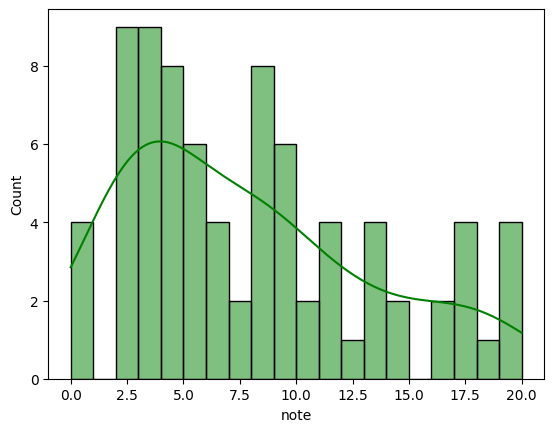

In [8]:
notes_sorted = notes.sort_values(by='note')
sns.histplot(notes_sorted['note'], kde=True, color='green', bins=20)

In [9]:
# pourcentage reussi
pourcentage_reussi = (notes['note'] >= 10).mean() * 100
print(pourcentage_reussi)

30.0


# DataFrame df avec les features

In [10]:
#pd.set_option('display.max_rows', None)
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
pseudo,78.0,NaN,NaN,NaN,461.705128,272.570501,5.0,225.5,461.5,669.75,1000.0
nb_actions,78.0,NaN,NaN,NaN,356.038462,164.081342,34.0,251.25,352.0,418.75,1085.0
moyenne_nb_actions,78.0,NaN,NaN,NaN,12.741224,2.944129,5.583333,11.0,12.814991,14.232906,24.74359
nb_jours_avec_action,78.0,NaN,NaN,NaN,27.679487,10.660637,5.0,21.0,26.5,32.0,71.0
std_actions_par_jour,78.0,NaN,NaN,NaN,11.291848,3.171925,5.278889,9.586779,11.015844,12.478766,28.897931
...,...,...,...,...,...,...,...,...,...,...,...
evenement_Travail remis supprimé.,78.0,NaN,NaN,NaN,0.128205,0.406409,0.0,0.0,0.0,0.0,2.0
evenement_Utilisateur évalué,78.0,NaN,NaN,NaN,1.128205,0.610705,0.0,1.0,1.0,1.0,4.0
evenement_Visite guidée commencée,78.0,NaN,NaN,NaN,0.038462,0.193552,0.0,0.0,0.0,0.0,1.0
evenement_Visite guidée terminée,78.0,NaN,NaN,NaN,0.038462,0.193552,0.0,0.0,0.0,0.0,1.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 66 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   pseudo                                                      78 non-null     int64  
 1   nb_actions                                                  78 non-null     int64  
 2   moyenne_nb_actions                                          78 non-null     float64
 3   nb_jours_avec_action                                        78 non-null     int64  
 4   std_actions_par_jour                                        78 non-null     float64
 5   tempsdiff_jours                                             78 non-null     int64  
 6   constance_activite                                          78 non-null     float64
 7   activite_moyenne_par_jour_min                               78 non-null     float64
 8   po

In [12]:
df.shape

(78, 66)

In [13]:
df.dtypes.value_counts()

int64      54
float64     9
object      3
Name: count, dtype: int64

<Figure size 640x480 with 0 Axes>

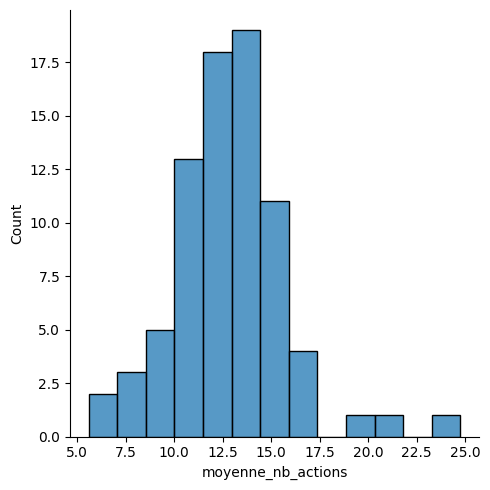

<Figure size 640x480 with 0 Axes>

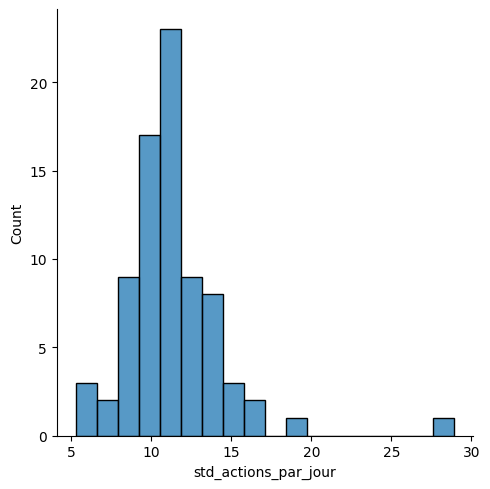

<Figure size 640x480 with 0 Axes>

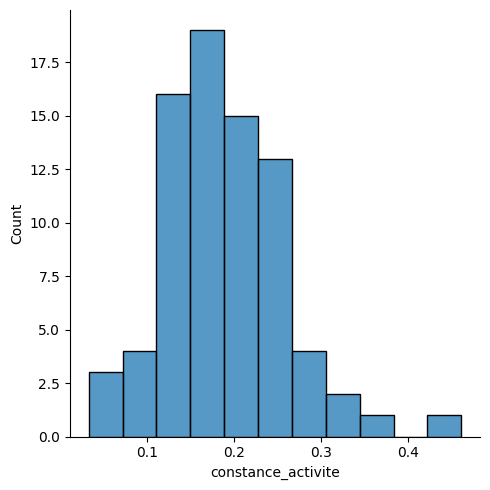

<Figure size 640x480 with 0 Axes>

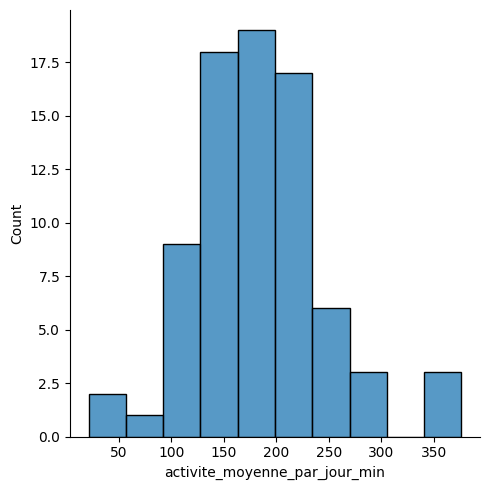

<Figure size 640x480 with 0 Axes>

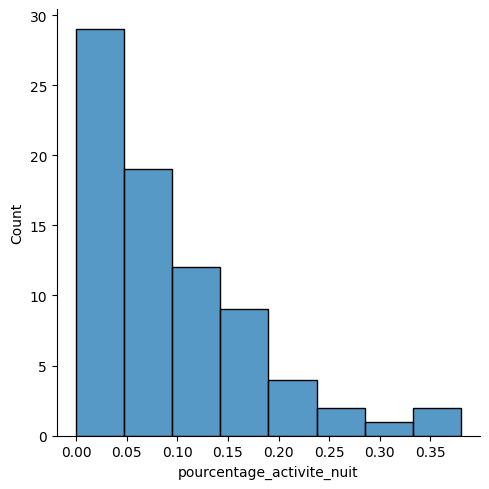

<Figure size 640x480 with 0 Axes>

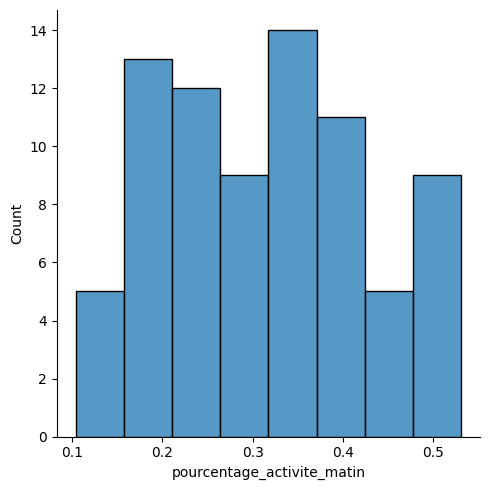

<Figure size 640x480 with 0 Axes>

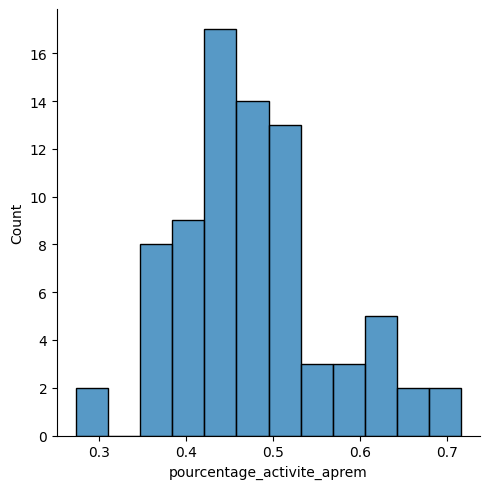

<Figure size 640x480 with 0 Axes>

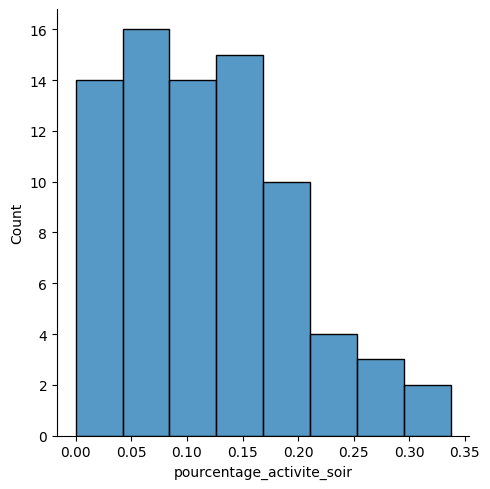

<Figure size 640x480 with 0 Axes>

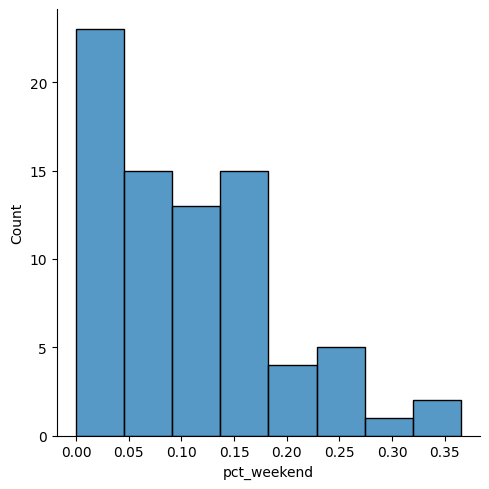

In [16]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.displot(df[col])

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_13224\2248101568.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


<Figure size 640x480 with 0 Axes>

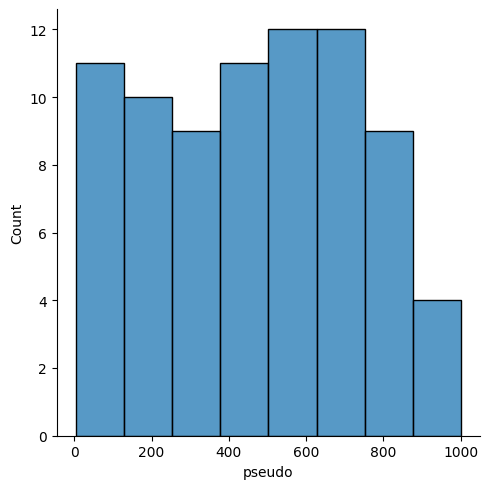

<Figure size 640x480 with 0 Axes>

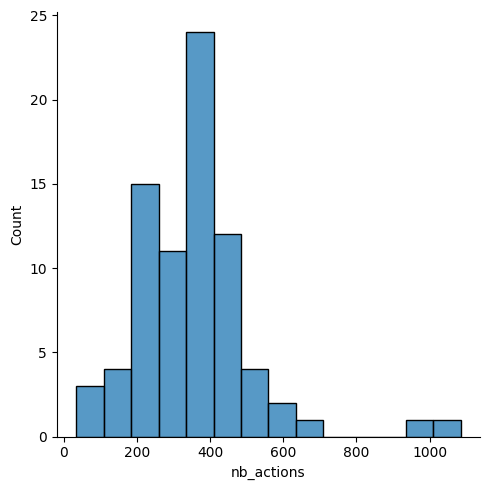

<Figure size 640x480 with 0 Axes>

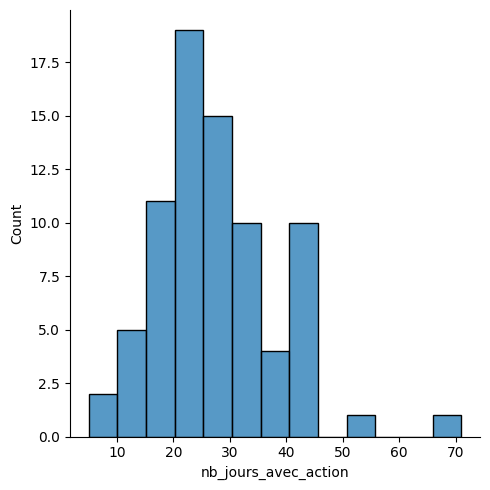

<Figure size 640x480 with 0 Axes>

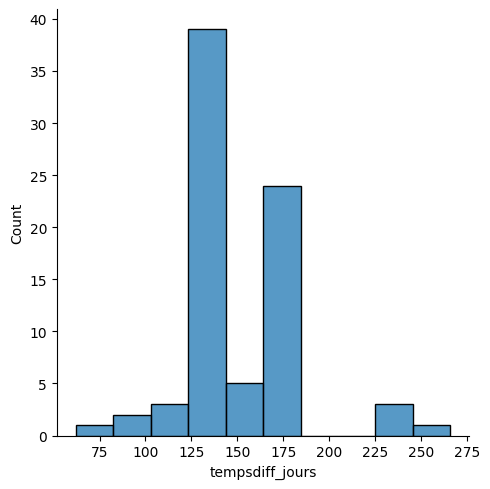

<Figure size 640x480 with 0 Axes>

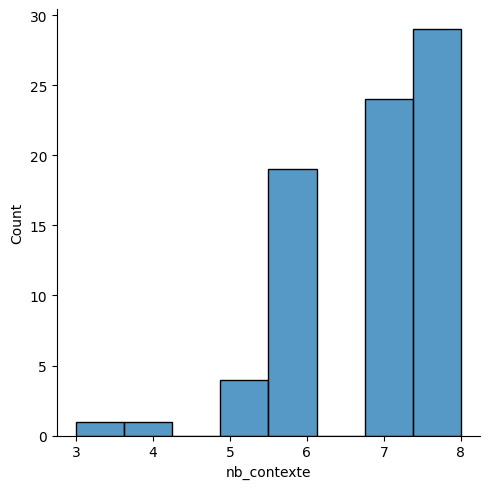

<Figure size 640x480 with 0 Axes>

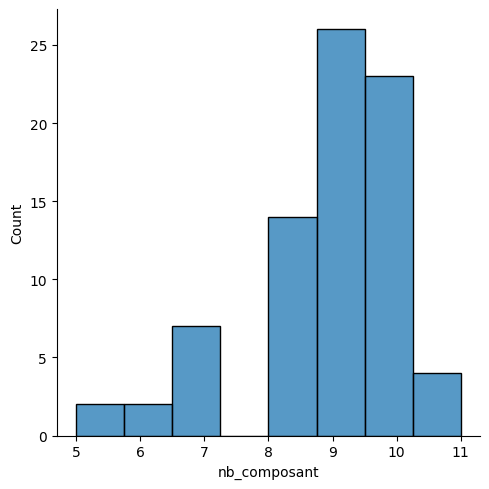

<Figure size 640x480 with 0 Axes>

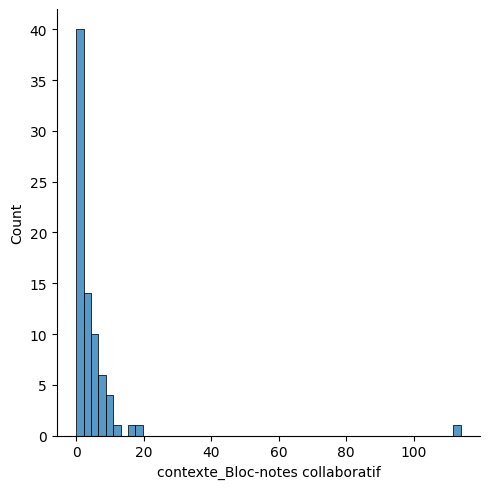

<Figure size 640x480 with 0 Axes>

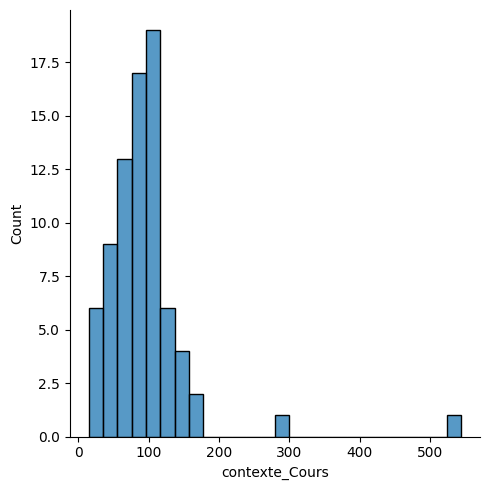

<Figure size 640x480 with 0 Axes>

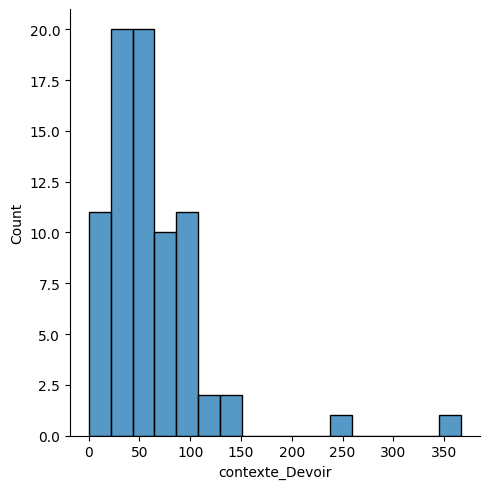

<Figure size 640x480 with 0 Axes>

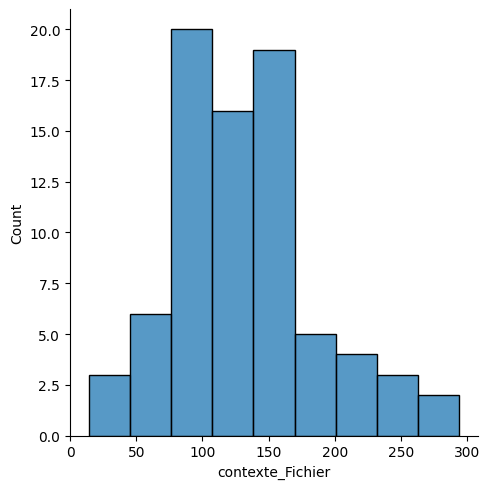

<Figure size 640x480 with 0 Axes>

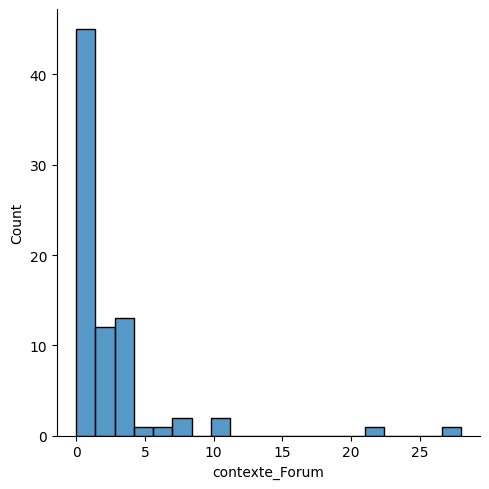

<Figure size 640x480 with 0 Axes>

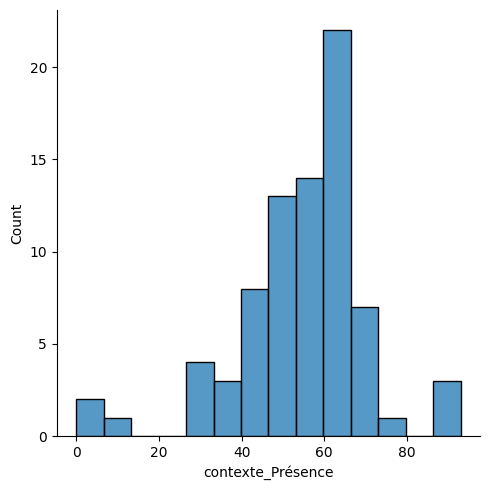

<Figure size 640x480 with 0 Axes>

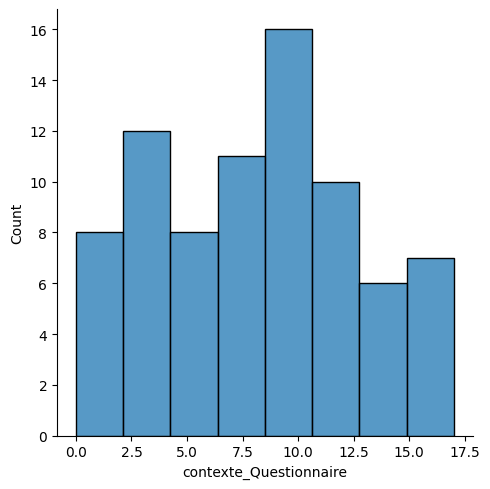

<Figure size 640x480 with 0 Axes>

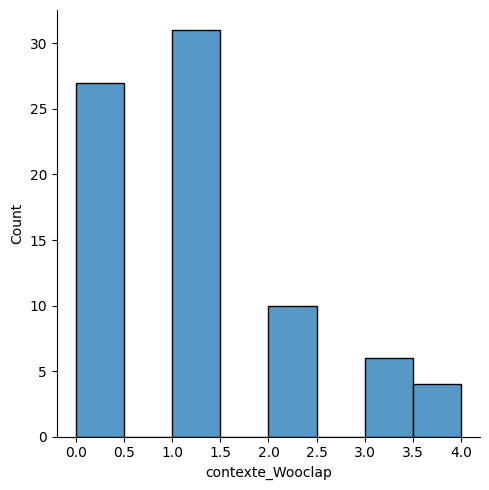

<Figure size 640x480 with 0 Axes>

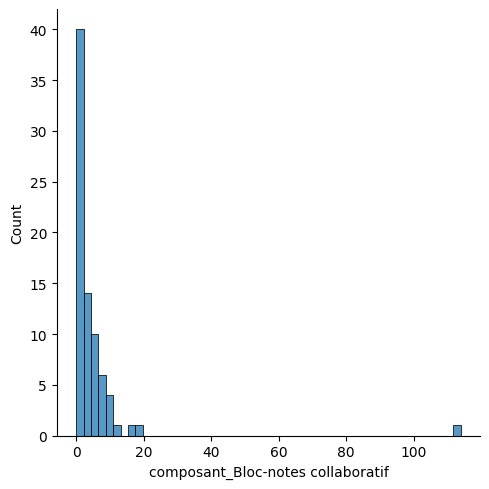

<Figure size 640x480 with 0 Axes>

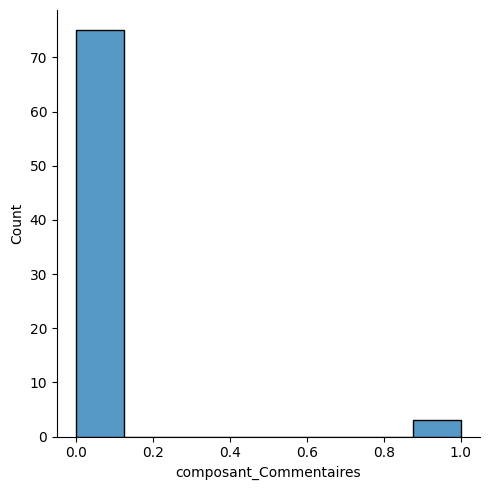

<Figure size 640x480 with 0 Axes>

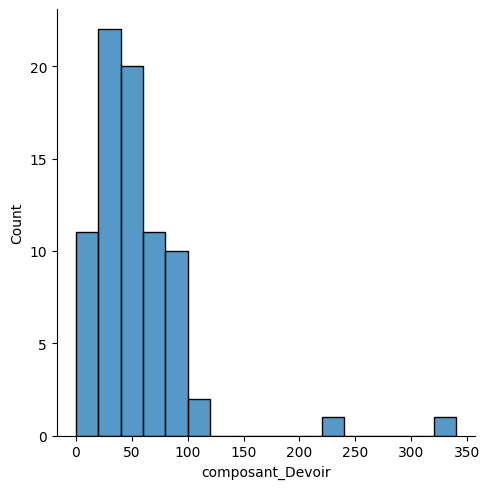

<Figure size 640x480 with 0 Axes>

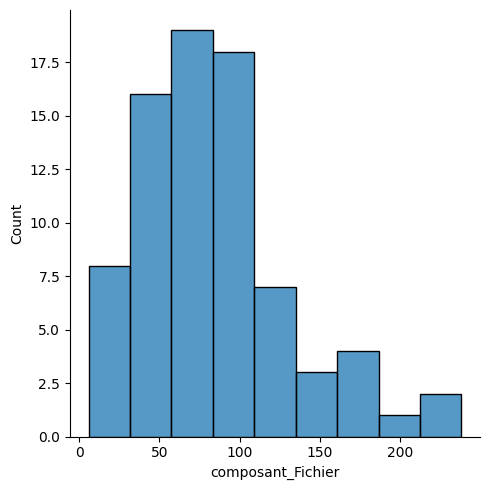

<Figure size 640x480 with 0 Axes>

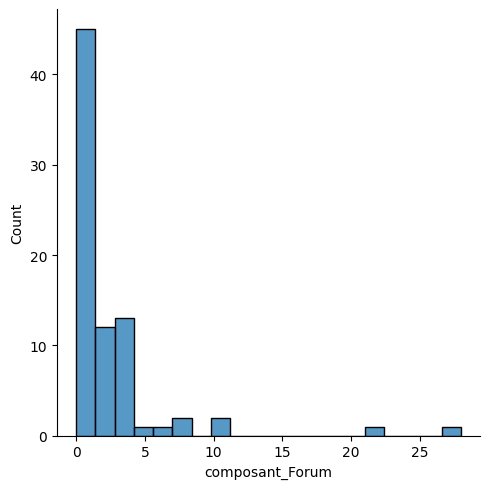

<Figure size 640x480 with 0 Axes>

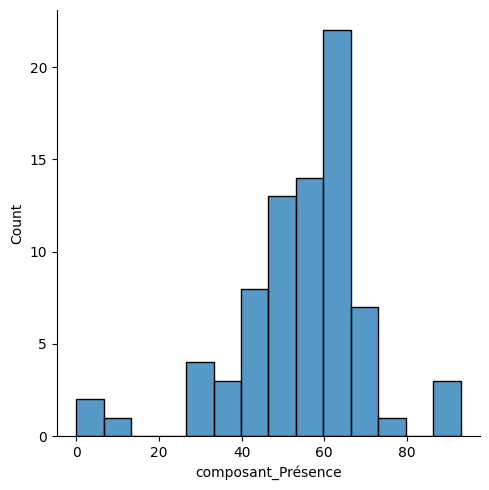

<Figure size 640x480 with 0 Axes>

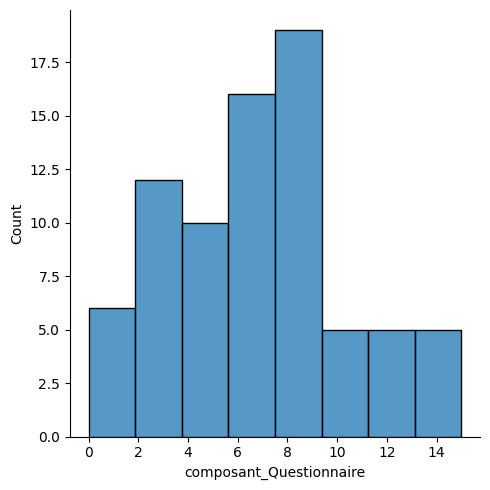

<Figure size 640x480 with 0 Axes>

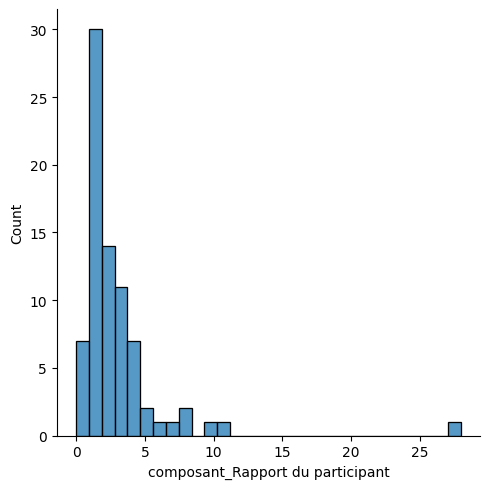

<Figure size 640x480 with 0 Axes>

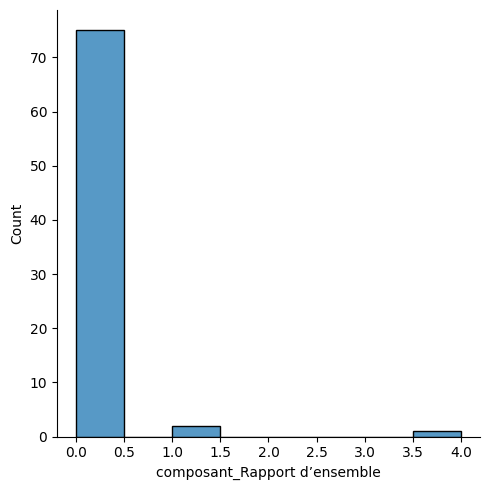

<Figure size 640x480 with 0 Axes>

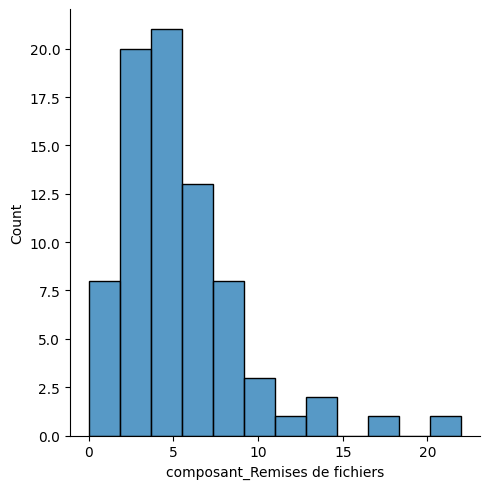

<Figure size 640x480 with 0 Axes>

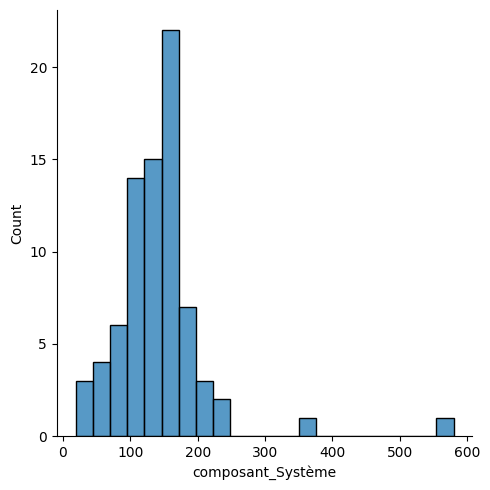

<Figure size 640x480 with 0 Axes>

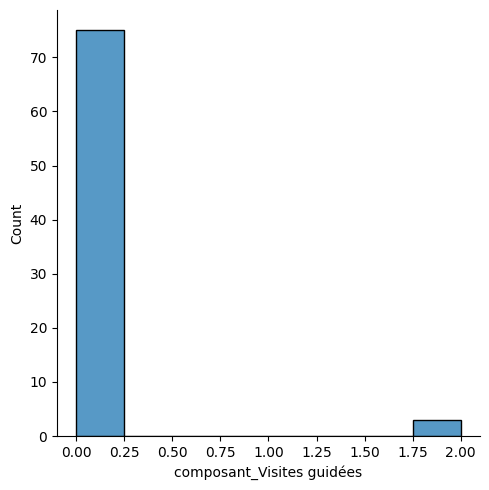

<Figure size 640x480 with 0 Axes>

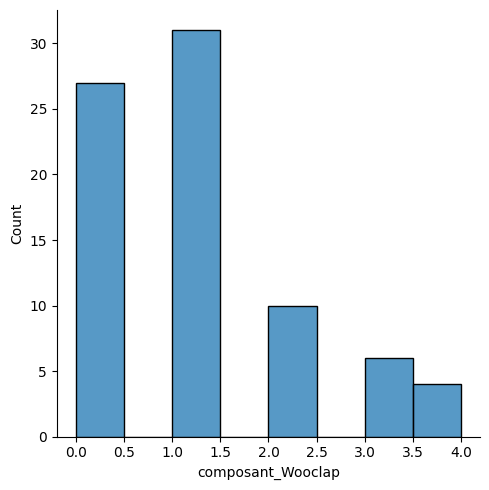

<Figure size 640x480 with 0 Axes>

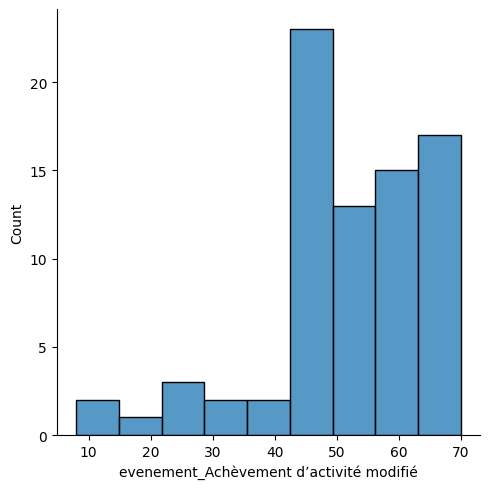

<Figure size 640x480 with 0 Axes>

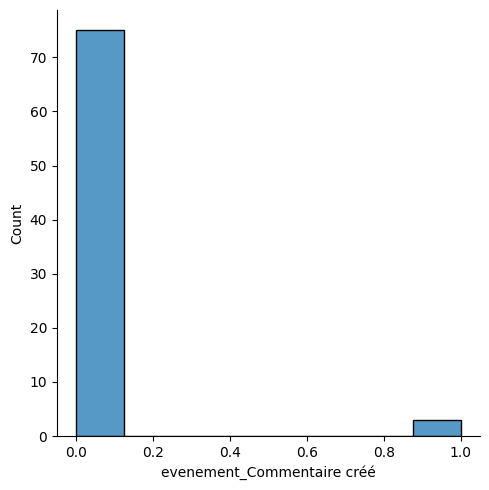

<Figure size 640x480 with 0 Axes>

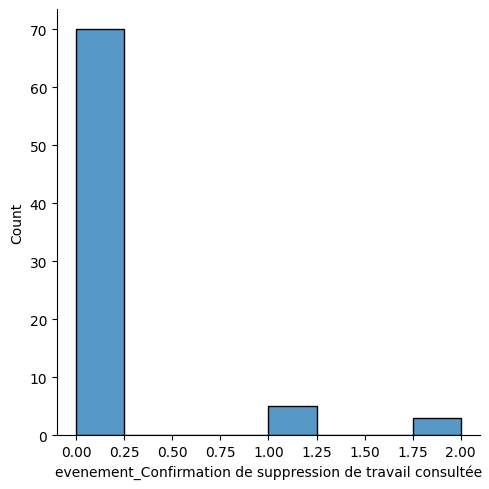

<Figure size 640x480 with 0 Axes>

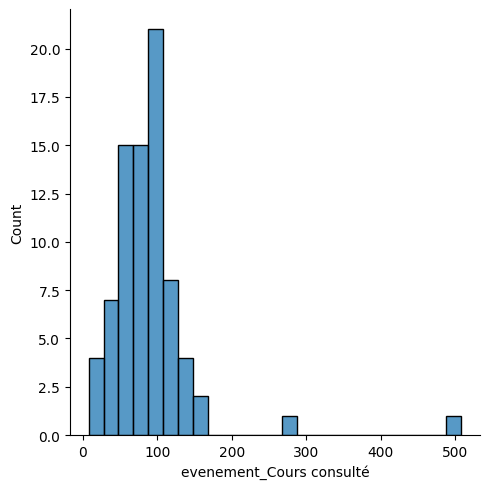

<Figure size 640x480 with 0 Axes>

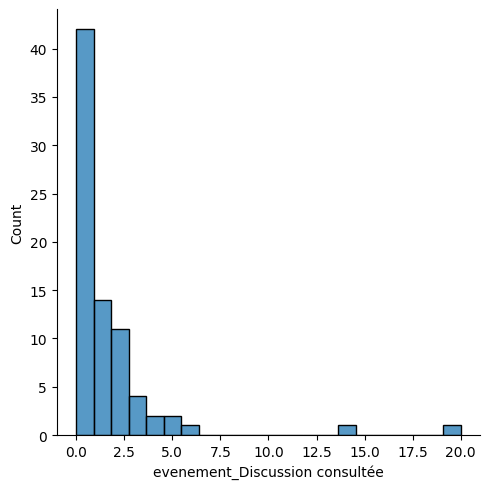

<Figure size 640x480 with 0 Axes>

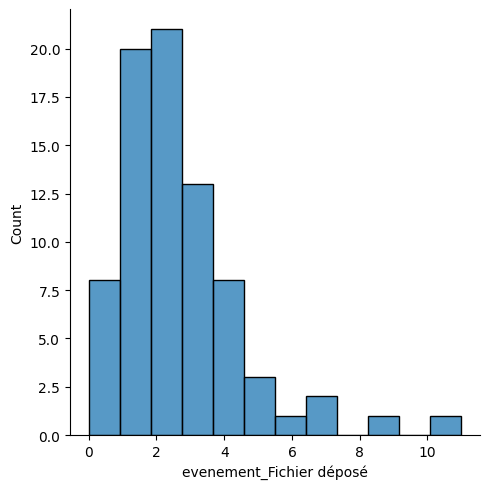

<Figure size 640x480 with 0 Axes>

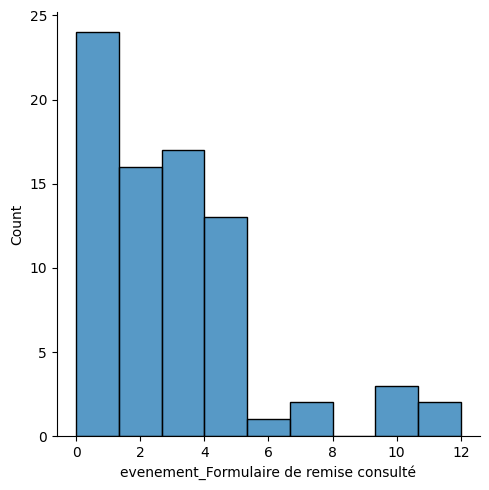

<Figure size 640x480 with 0 Axes>

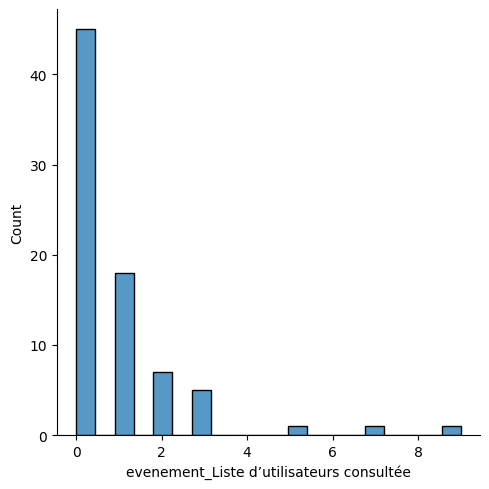

<Figure size 640x480 with 0 Axes>

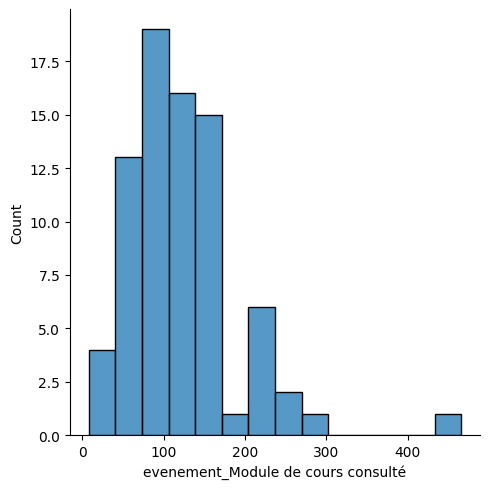

<Figure size 640x480 with 0 Axes>

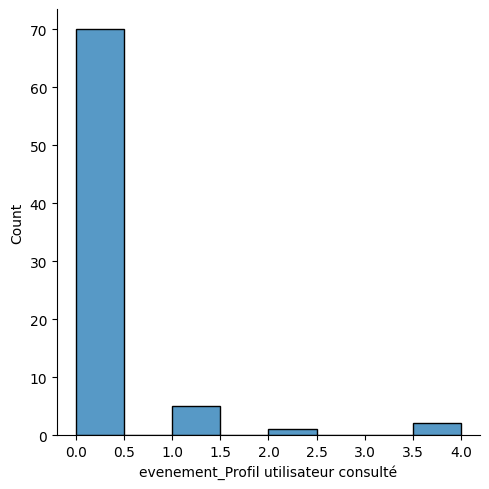

<Figure size 640x480 with 0 Axes>

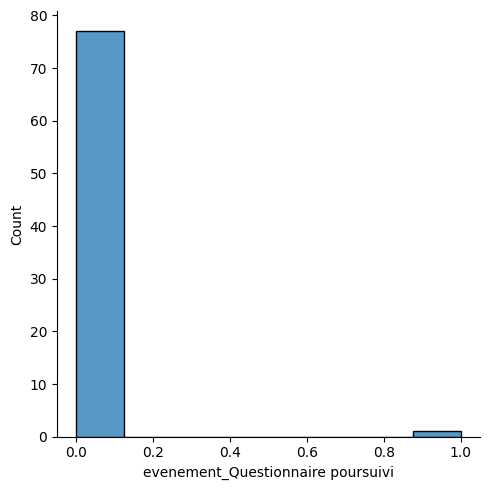

<Figure size 640x480 with 0 Axes>

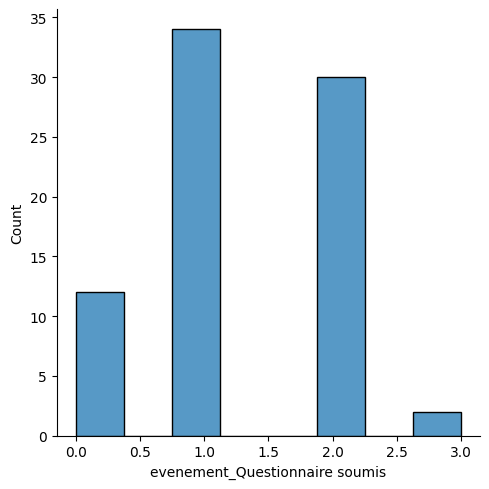

<Figure size 640x480 with 0 Axes>

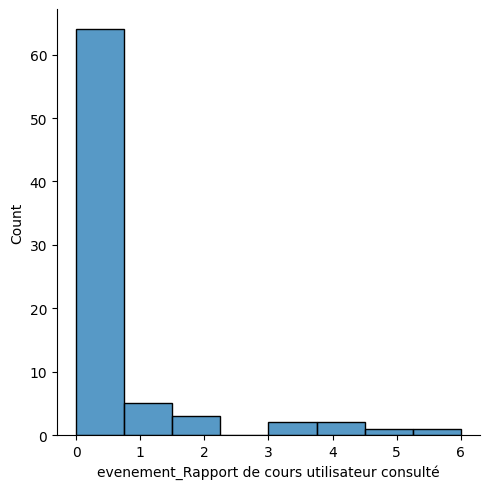

<Figure size 640x480 with 0 Axes>

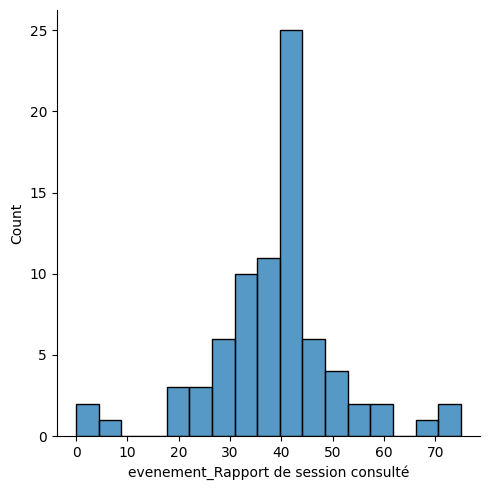

<Figure size 640x480 with 0 Axes>

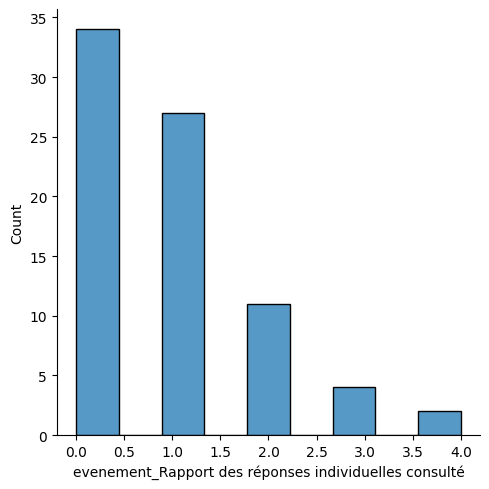

<Figure size 640x480 with 0 Axes>

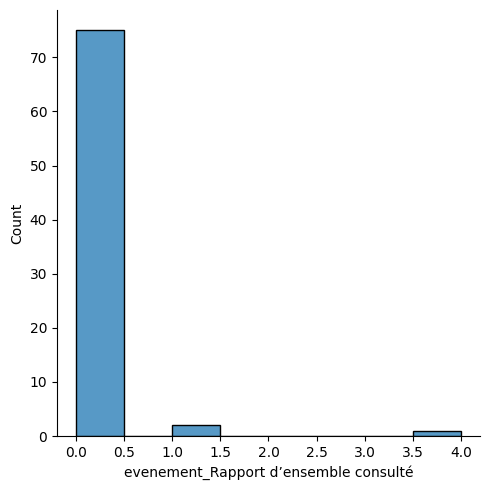

<Figure size 640x480 with 0 Axes>

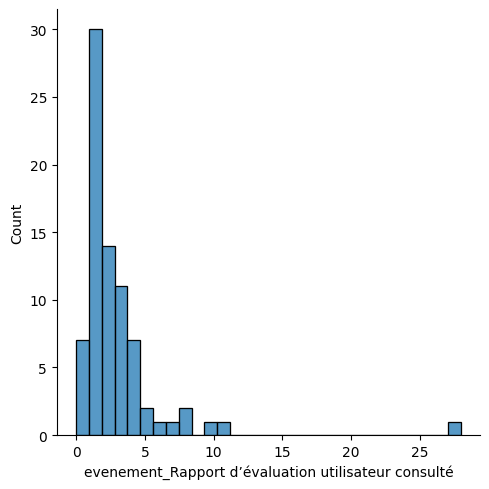

<Figure size 640x480 with 0 Axes>

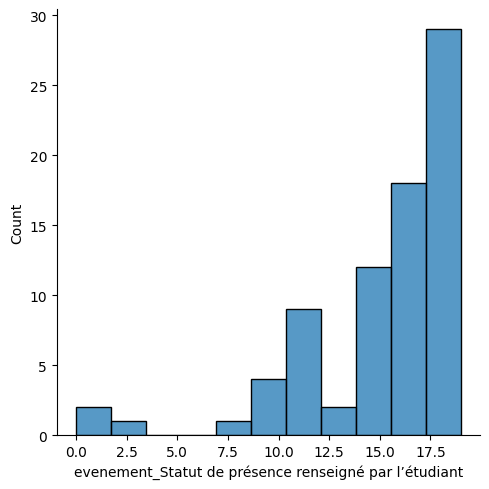

<Figure size 640x480 with 0 Axes>

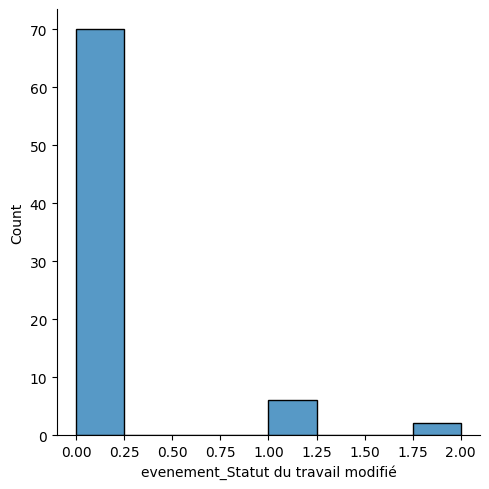

<Figure size 640x480 with 0 Axes>

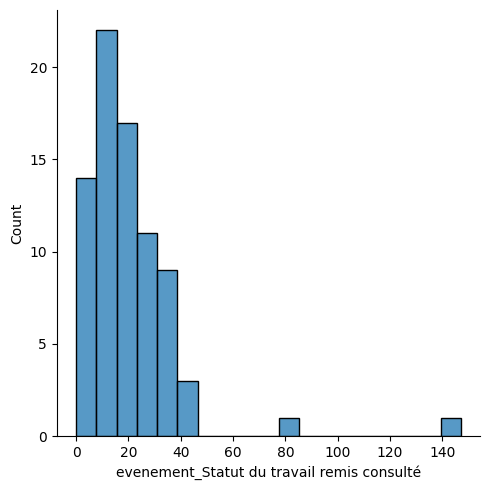

<Figure size 640x480 with 0 Axes>

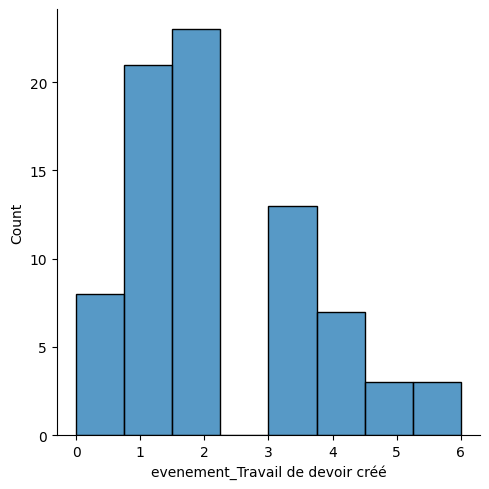

<Figure size 640x480 with 0 Axes>

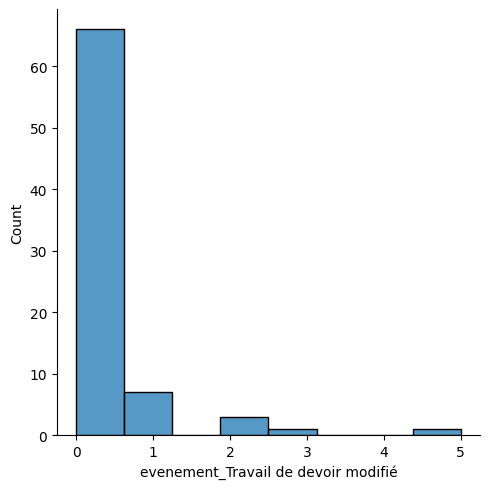

<Figure size 640x480 with 0 Axes>

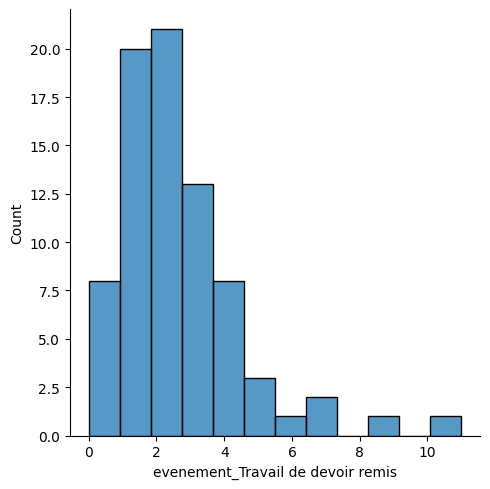

<Figure size 640x480 with 0 Axes>

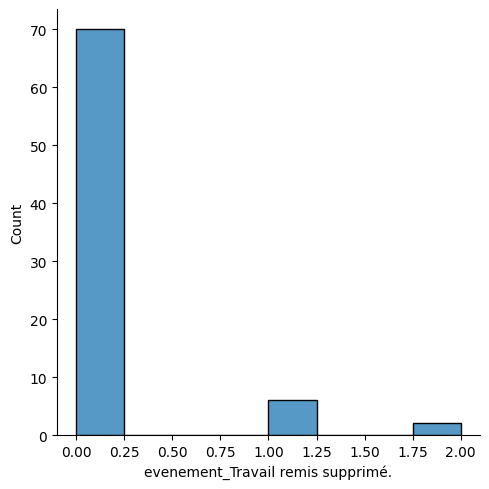

<Figure size 640x480 with 0 Axes>

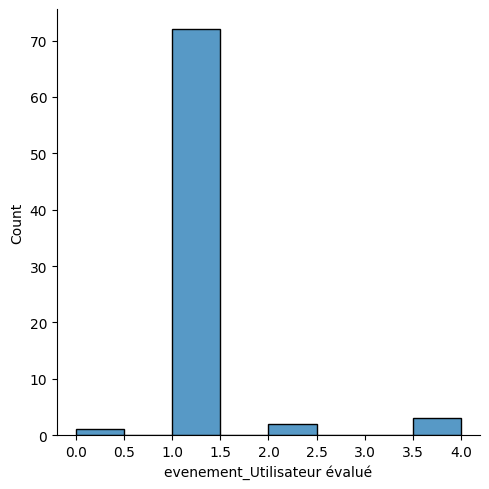

<Figure size 640x480 with 0 Axes>

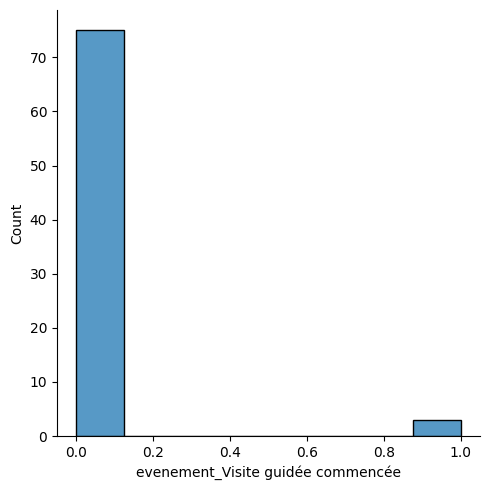

<Figure size 640x480 with 0 Axes>

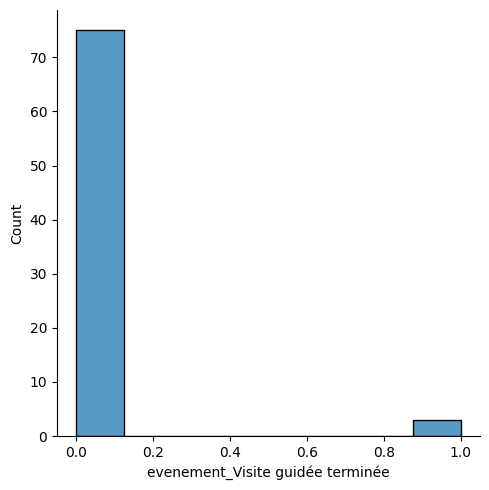

In [17]:
for col in df.select_dtypes('int'):
    plt.figure()
    sns.displot(df[col])

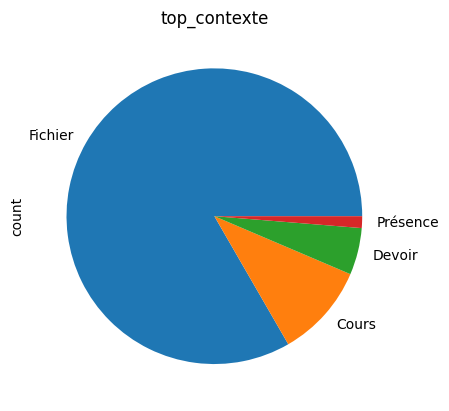

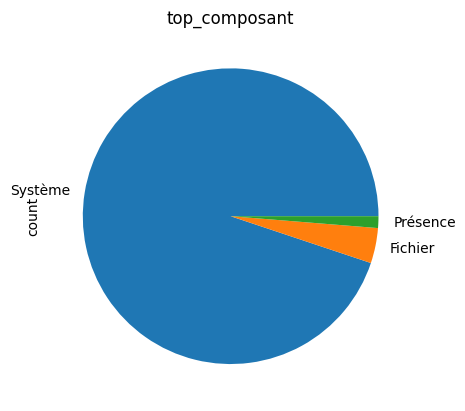

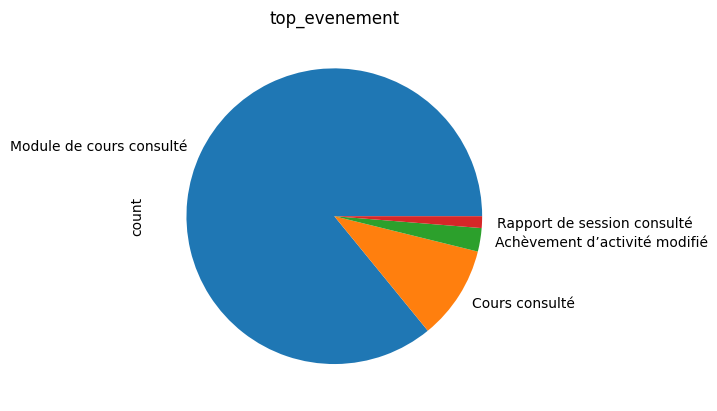

In [22]:
for col in df.select_dtypes('object'):
    plt.figure()
    df[col].value_counts().plot.pie()
    plt.title(col)

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_13224\1788311849.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


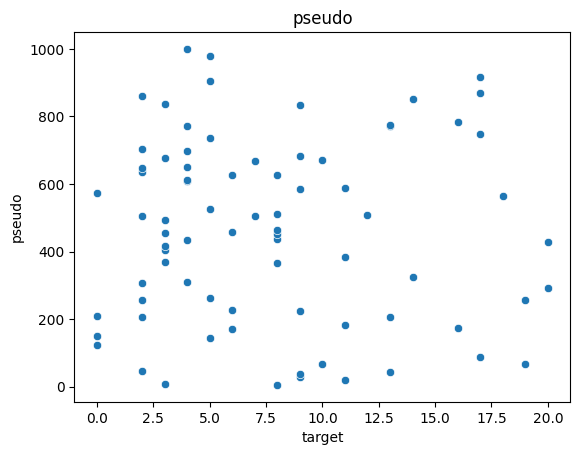

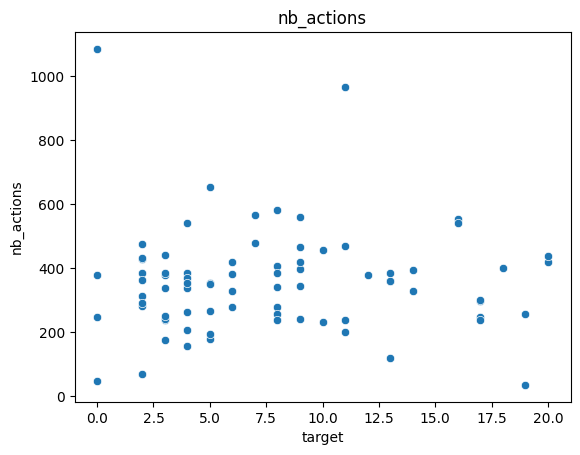

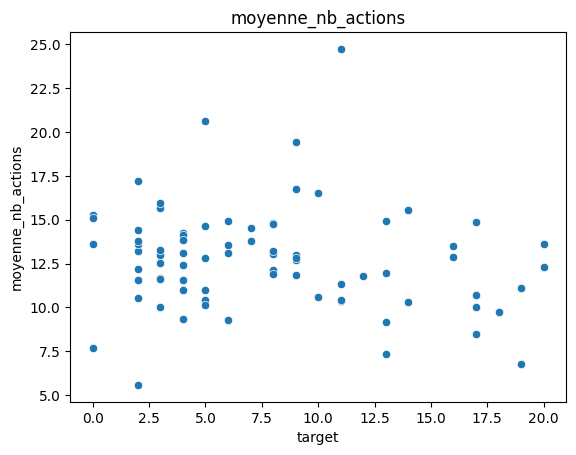

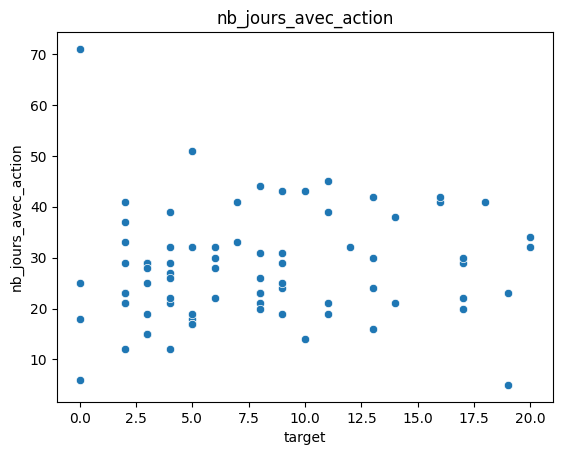

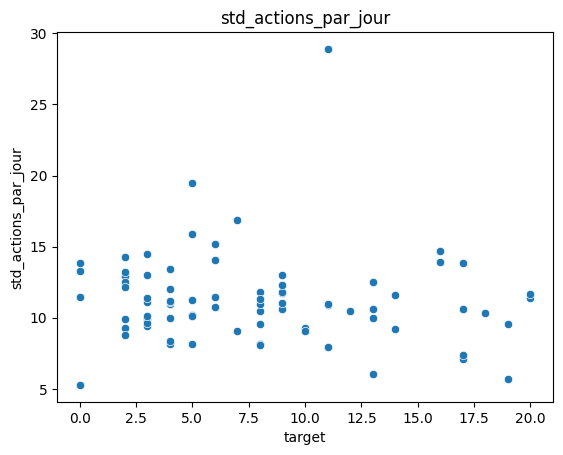

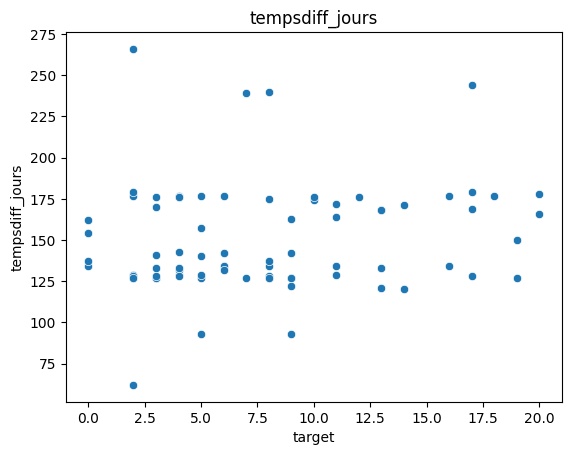

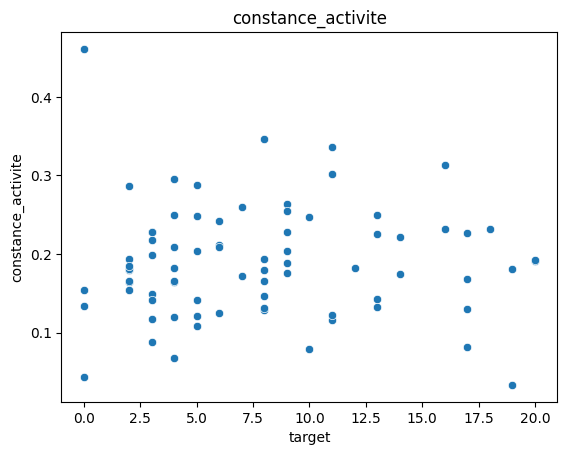

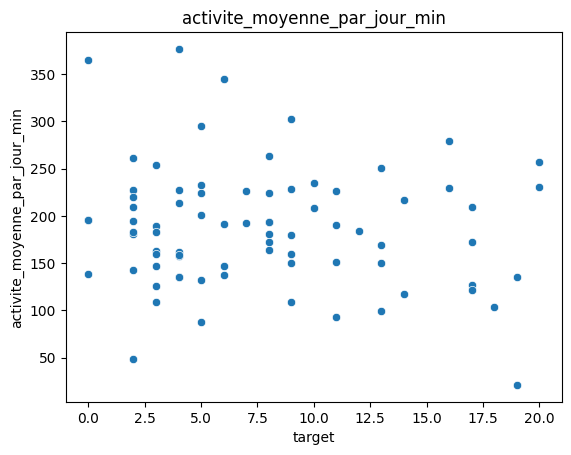

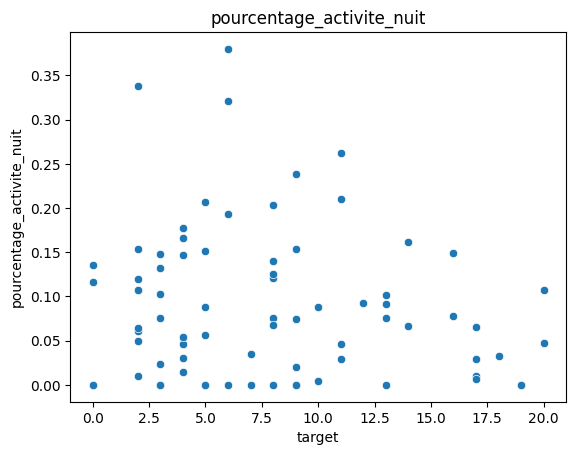

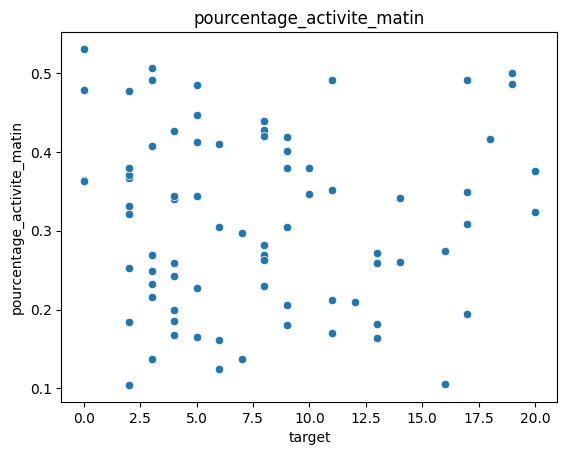

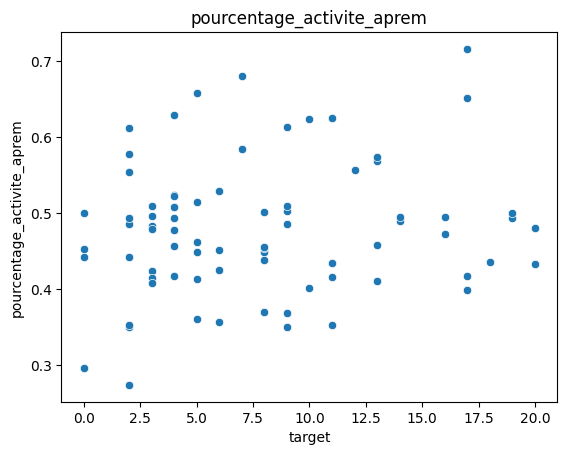

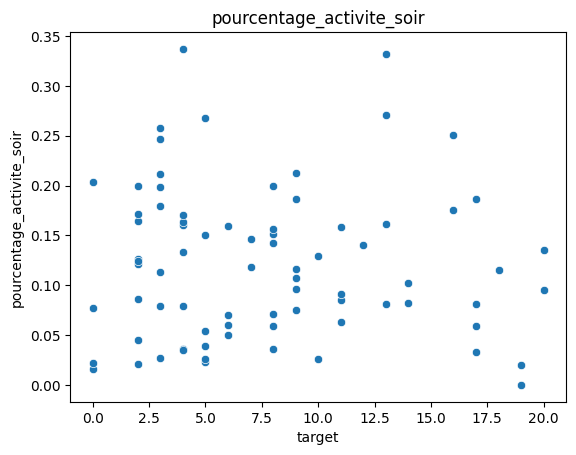

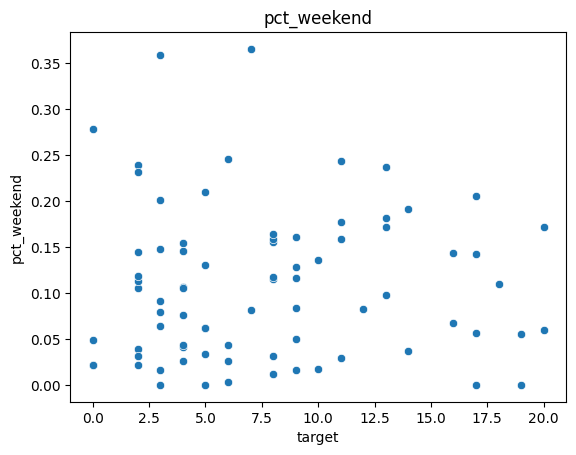

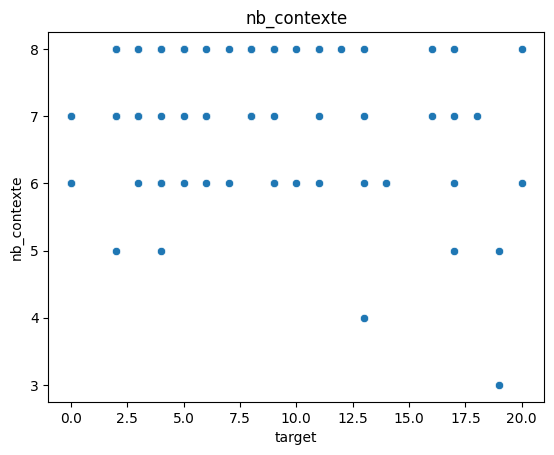

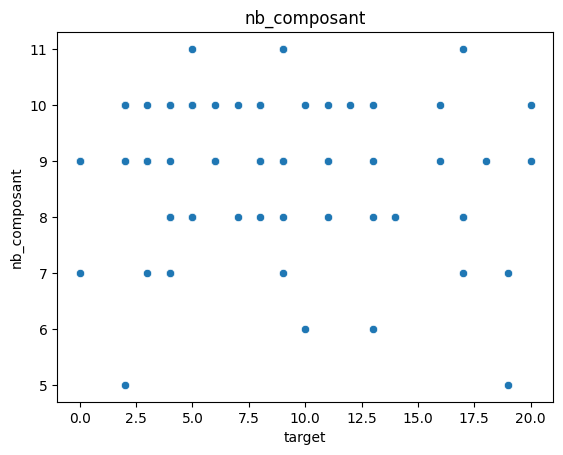

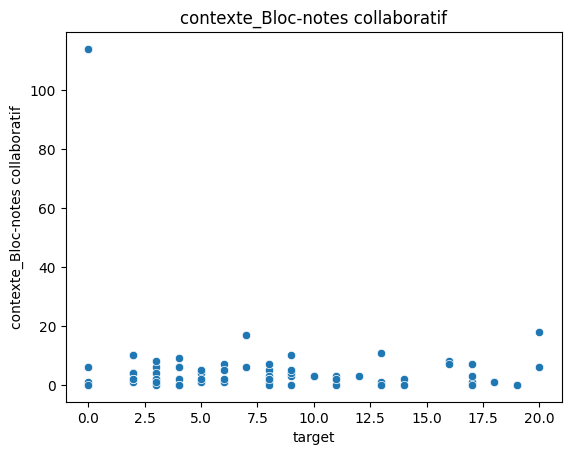

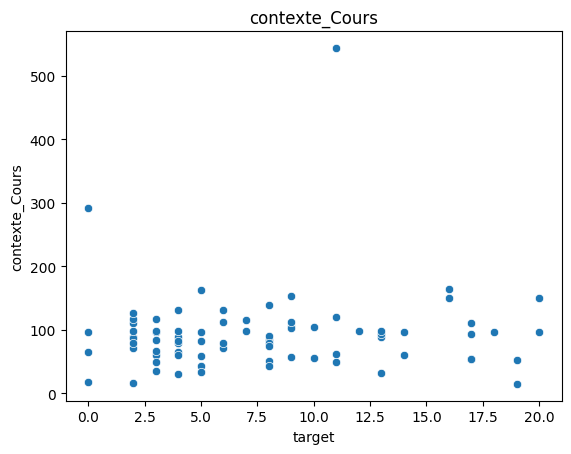

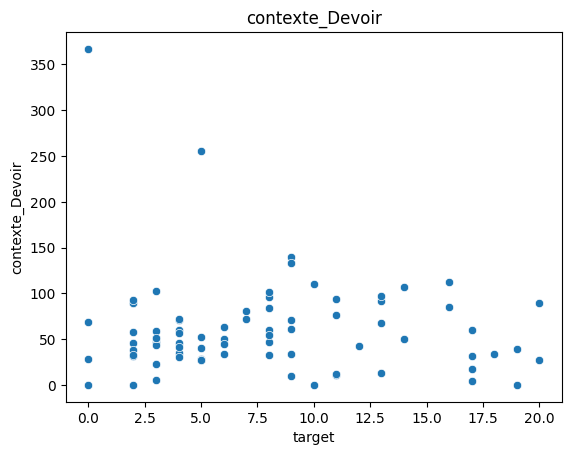

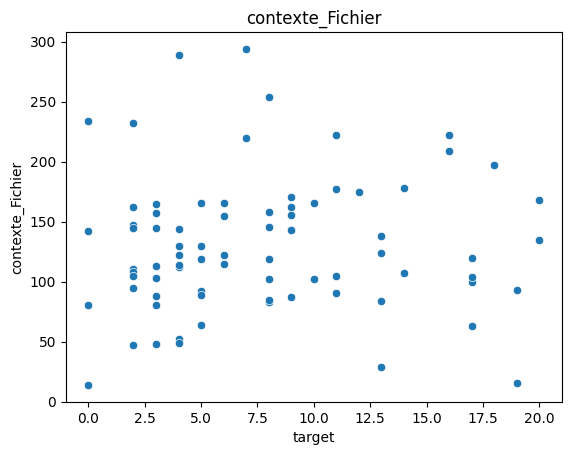

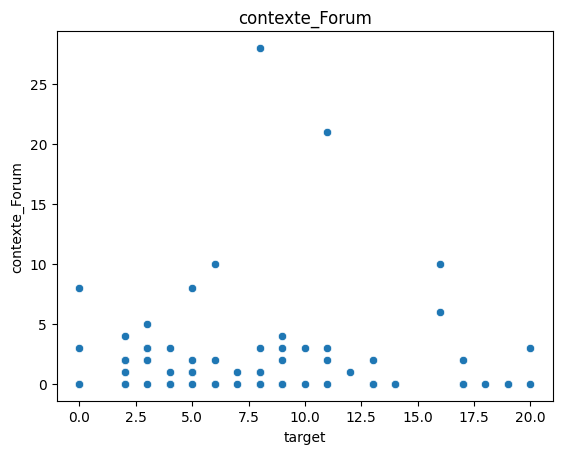

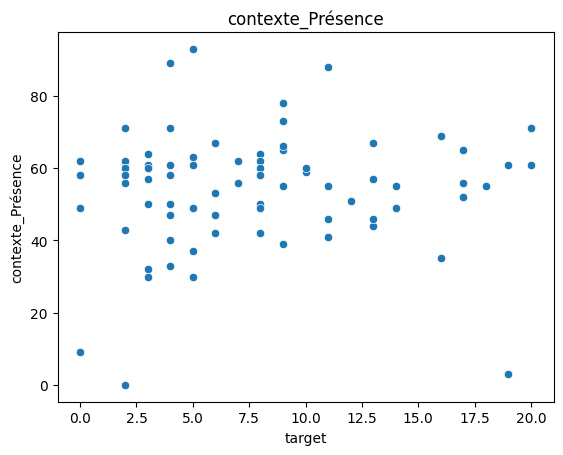

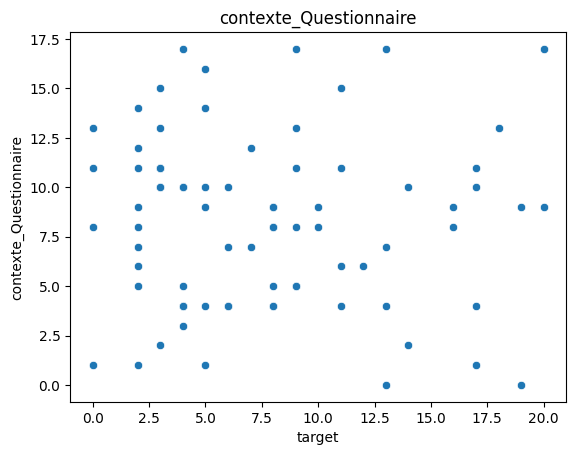

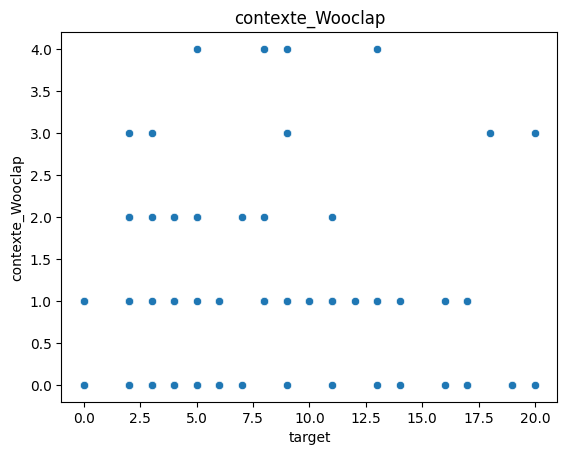

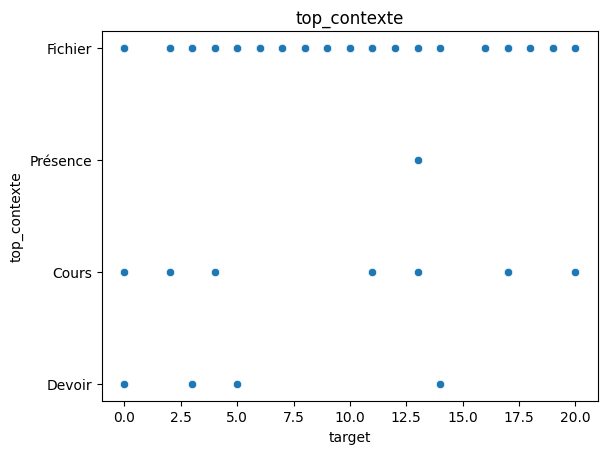

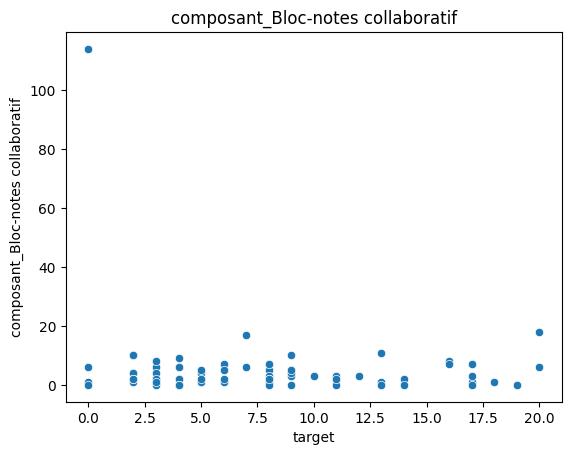

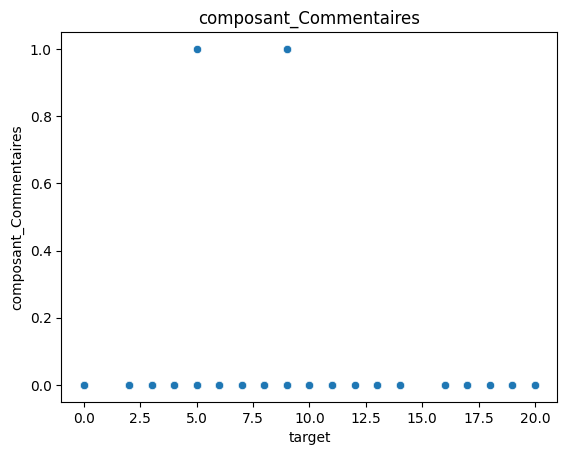

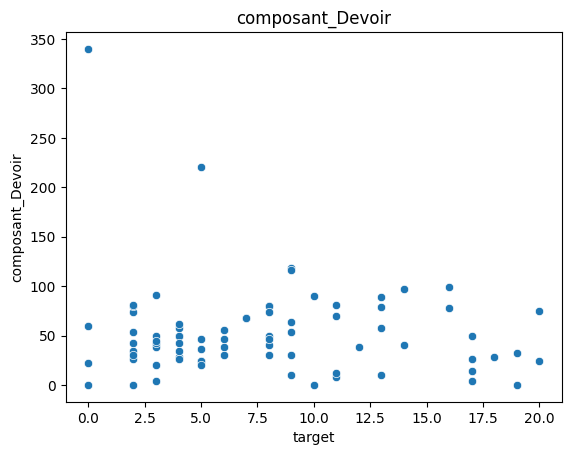

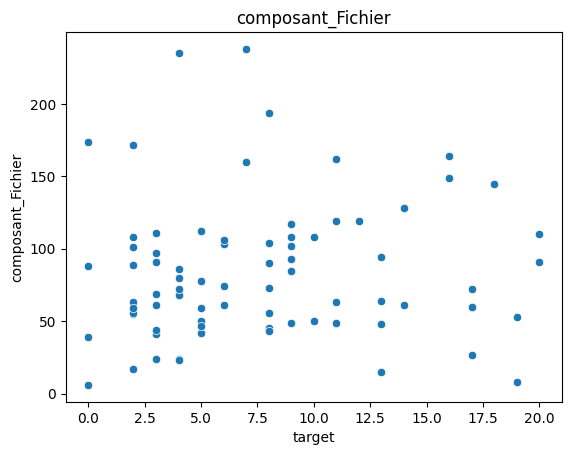

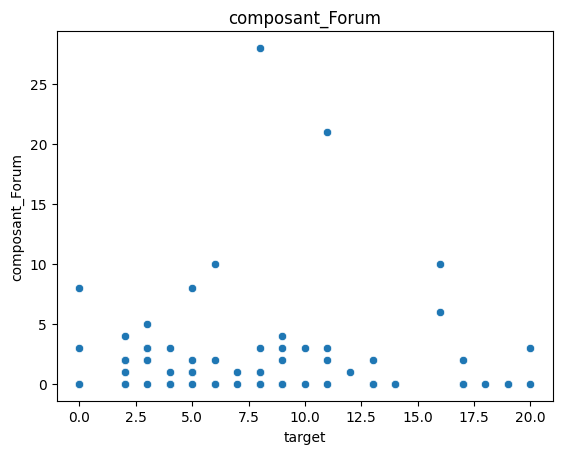

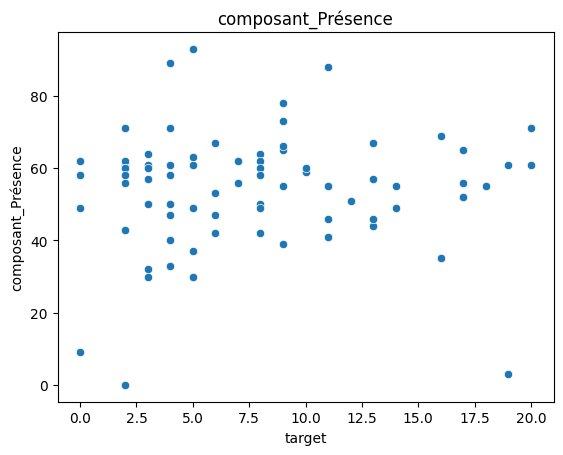

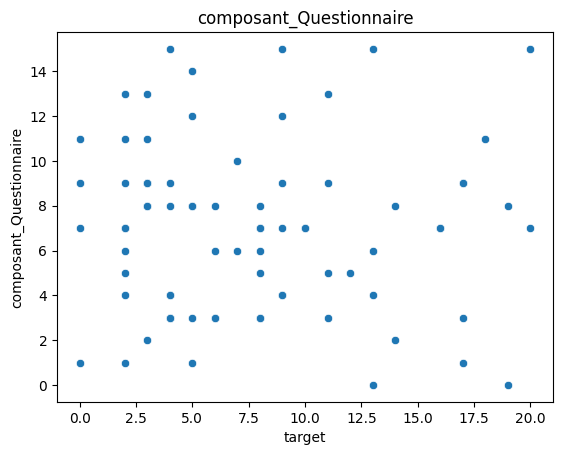

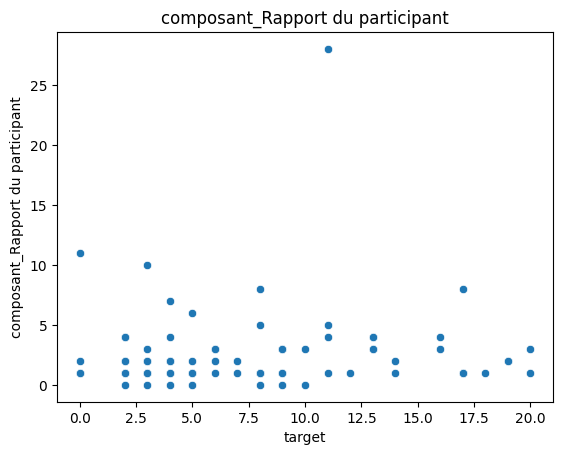

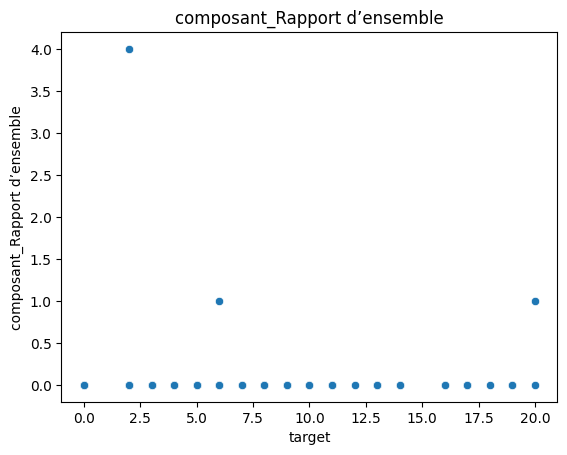

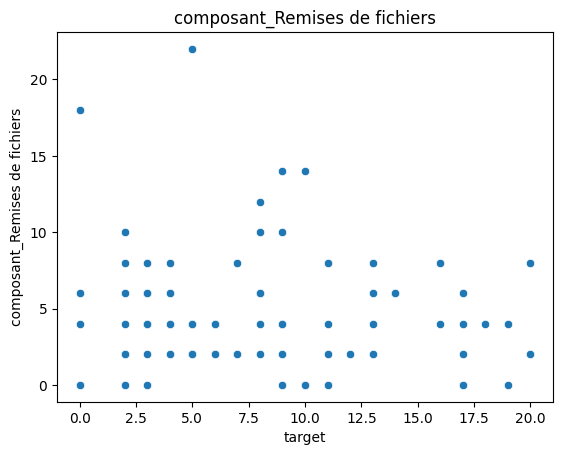

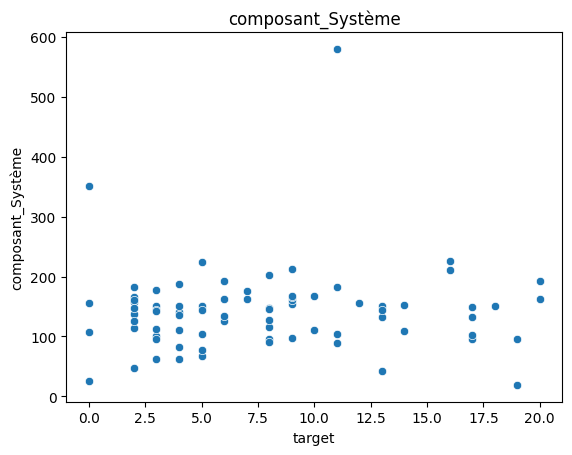

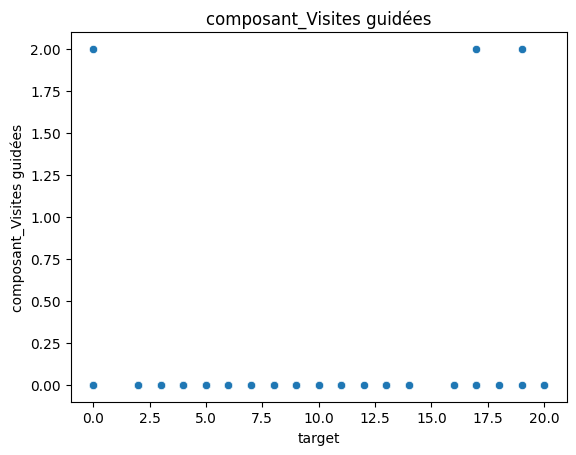

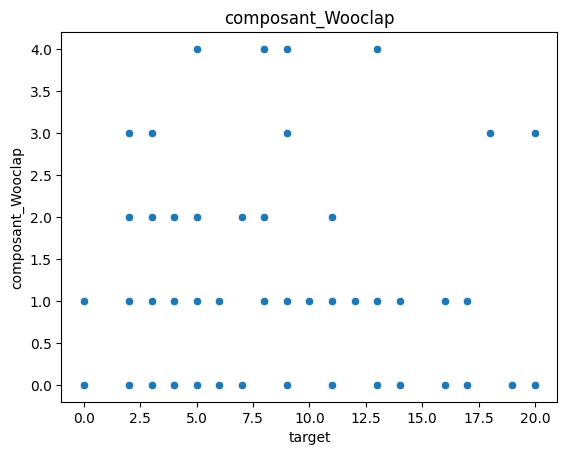

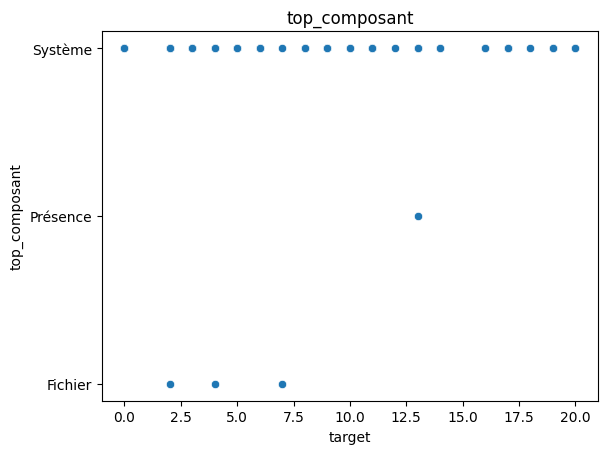

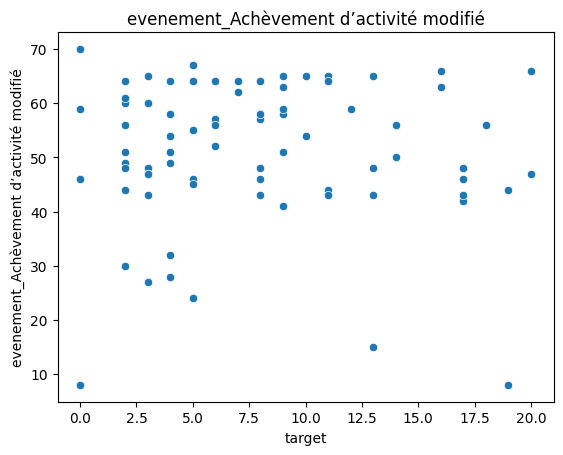

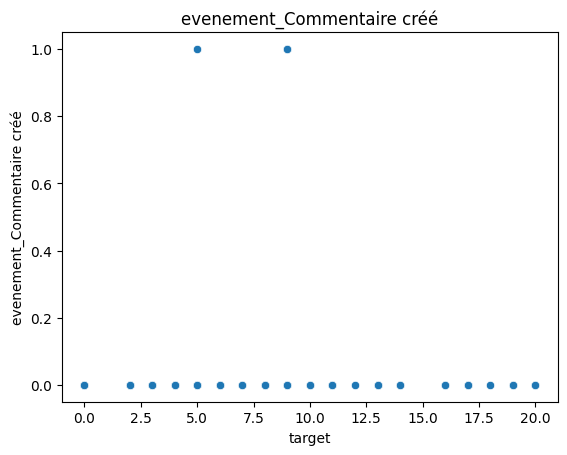

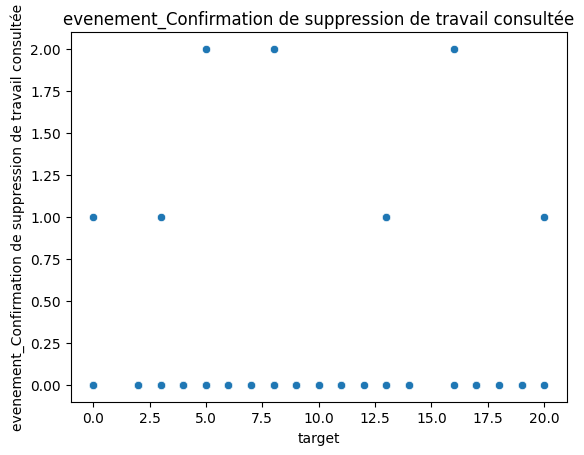

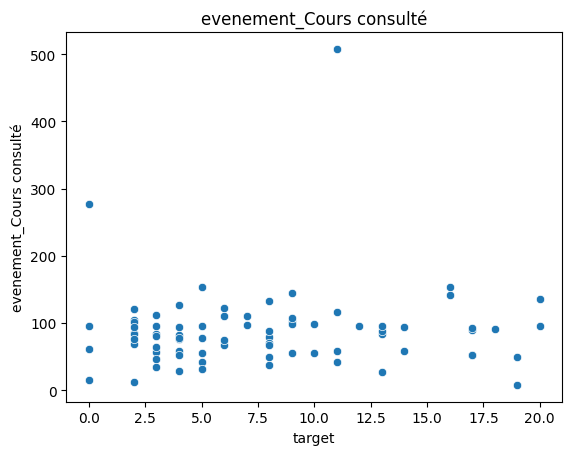

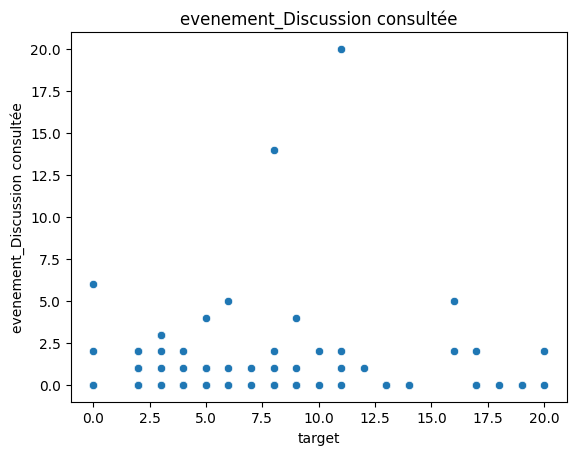

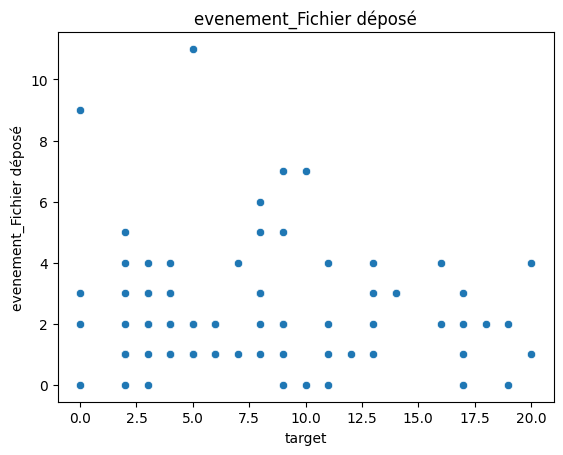

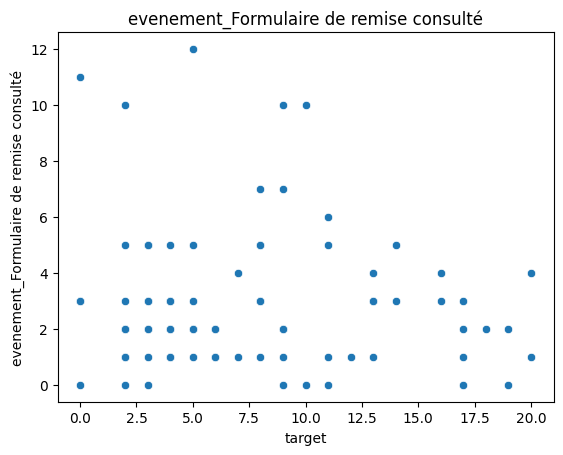

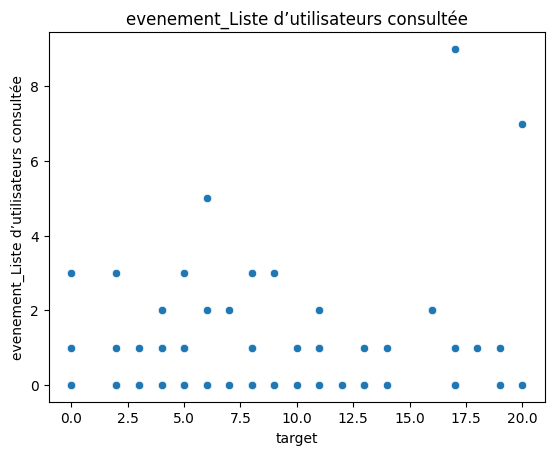

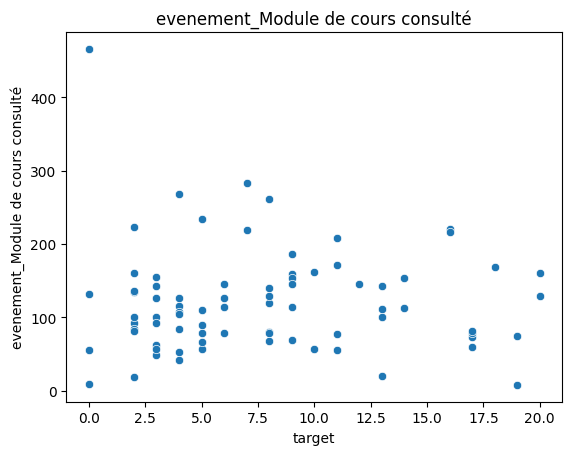

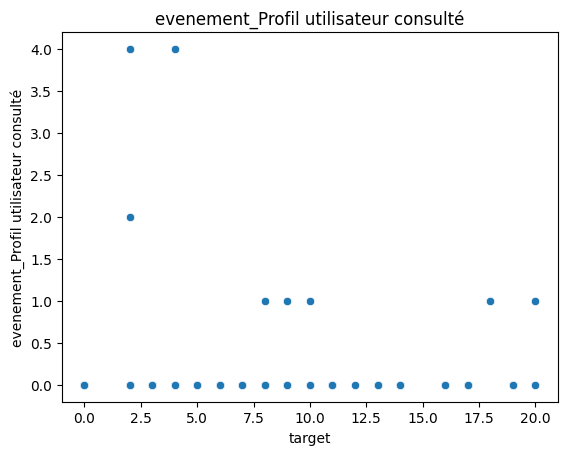

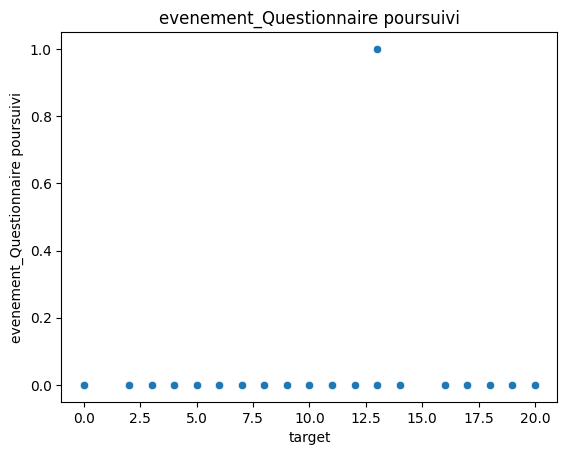

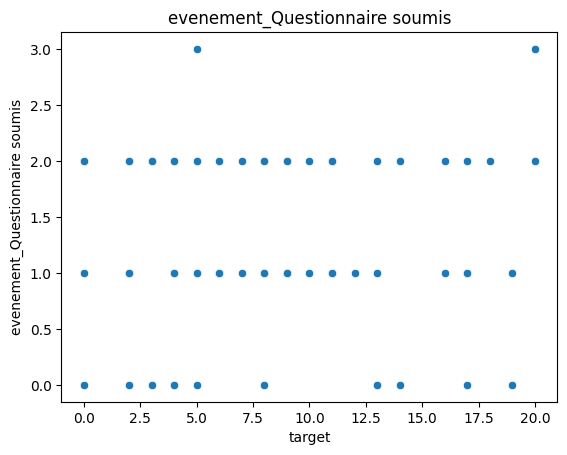

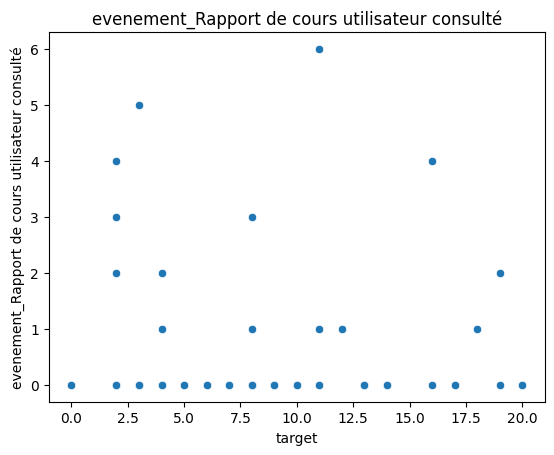

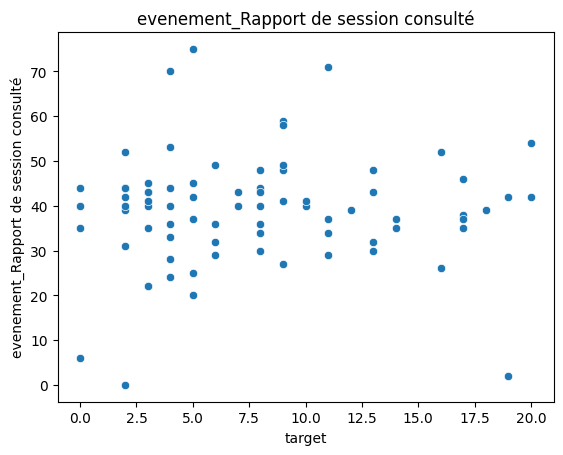

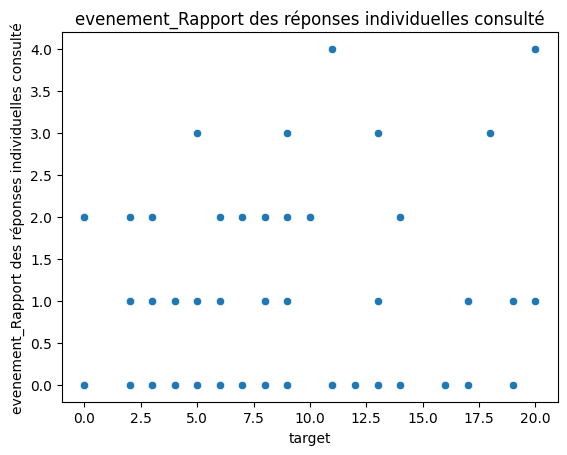

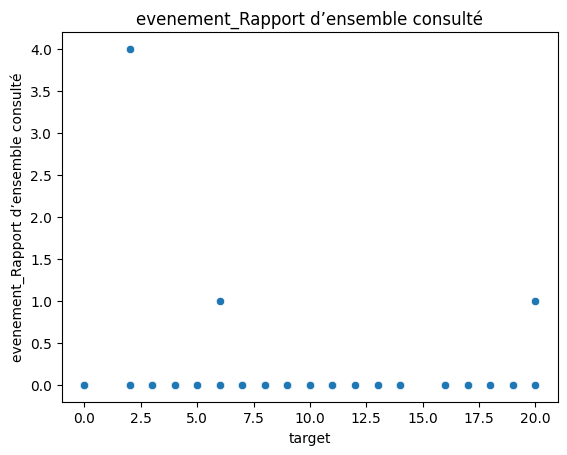

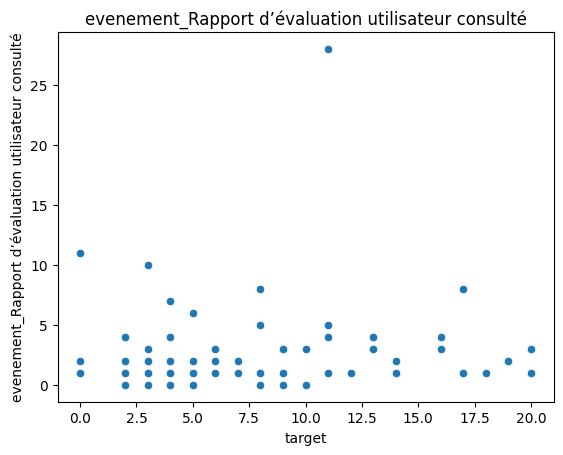

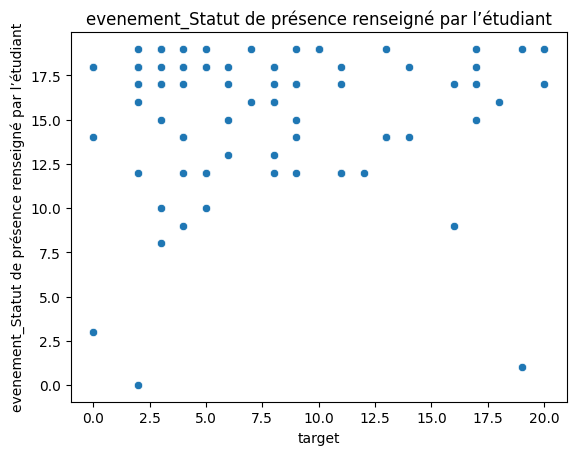

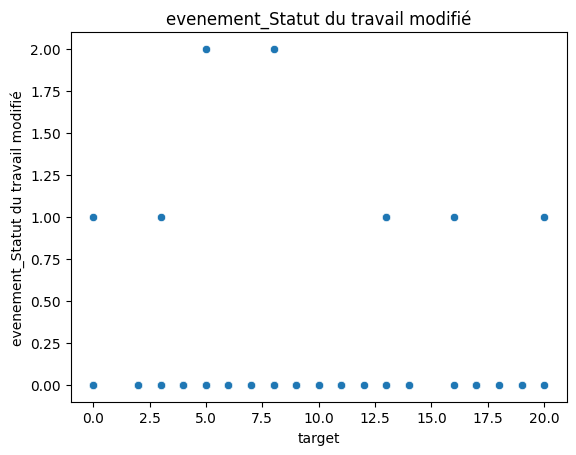

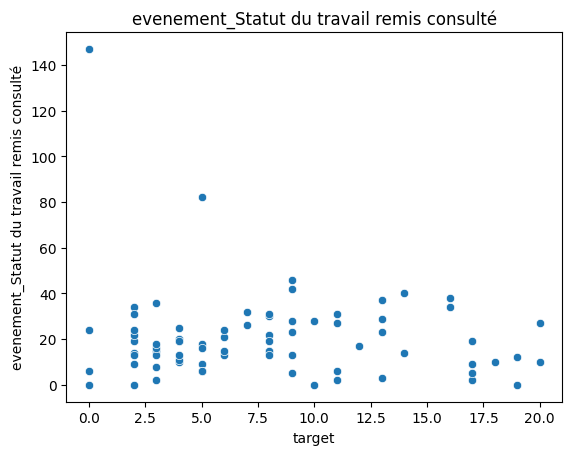

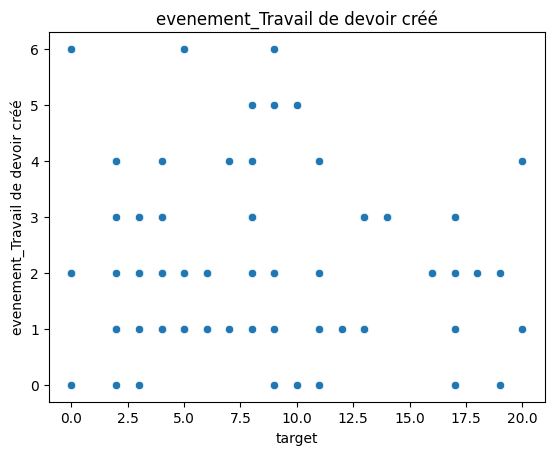

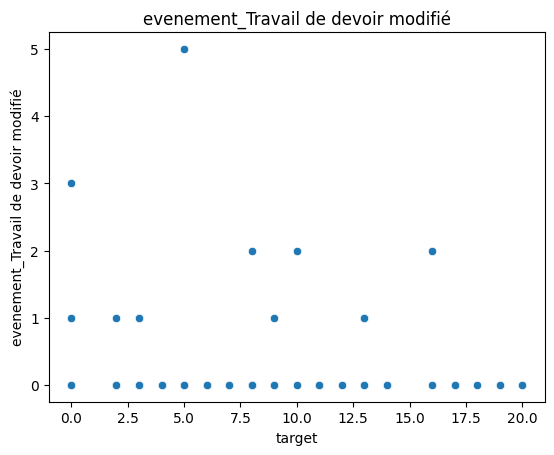

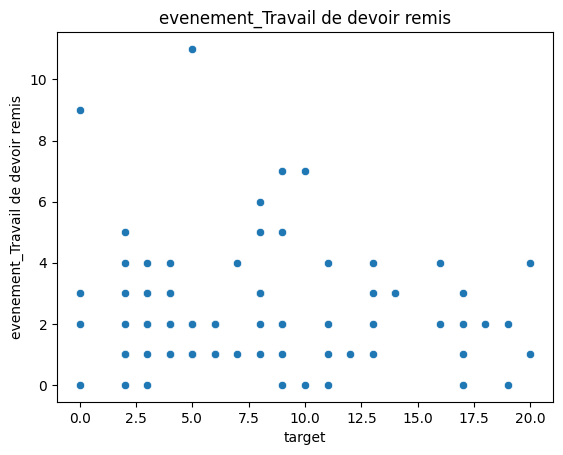

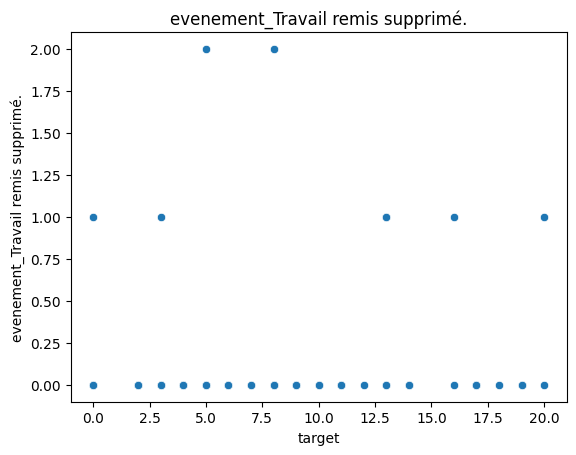

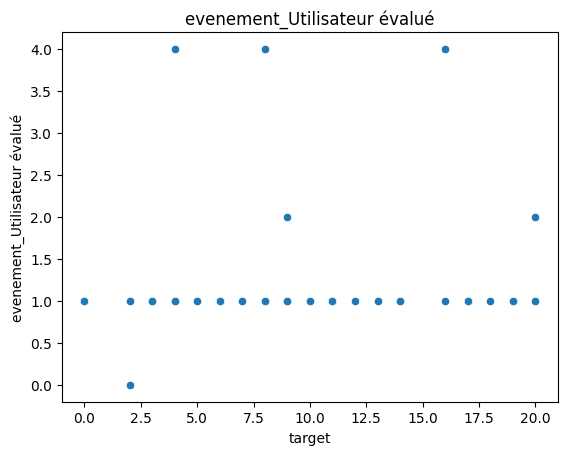

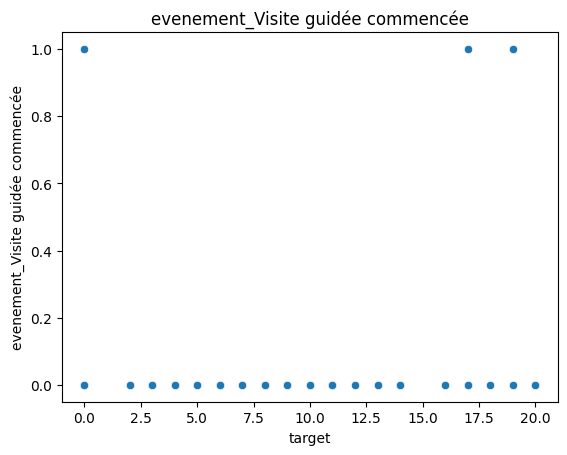

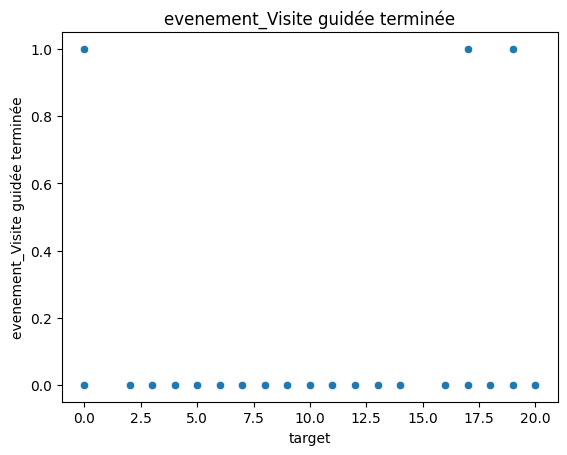

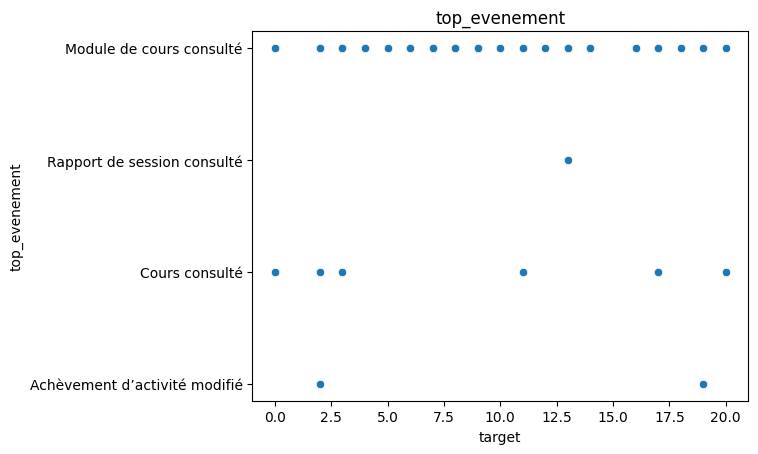

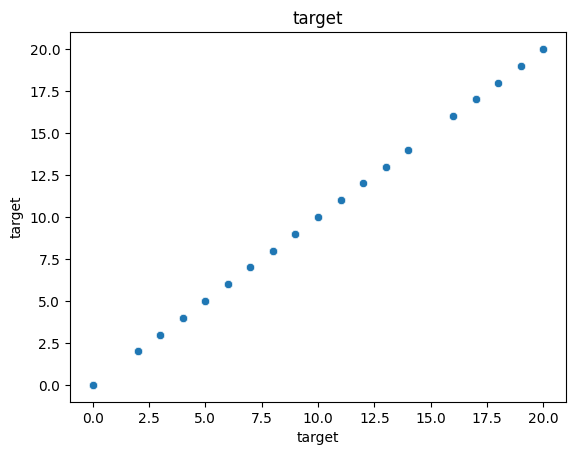

In [29]:
for col in df:
    df['target'] = notes['note']
    plt.figure()
    sns.scatterplot(data=df, x='target', y=col)
    plt.title(col)

In [36]:
pd.set_option('display.max_rows', 70)
correlations = []
for col in df.select_dtypes('float'):
    corr_value = df[col].corr(notes['note'])
    correlations.append((col, corr_value))
for col in df.select_dtypes('int'):
    corr_value = df[col].corr(notes['note'])
    correlations.append((col, corr_value))

correlation_df = pd.DataFrame(correlations, columns=['Feature', 'Correlation'])
print(correlation_df.sort_values(by='Correlation', ascending=False))

                                              Feature  Correlation
63                                             target     1.000000
43           evenement_Liste d’utilisateurs consultée     0.232871
12                                    tempsdiff_jours     0.181313
62                   evenement_Visite guidée terminée     0.156943
61                  evenement_Visite guidée commencée     0.156943
34                          composant_Visites guidées     0.156943
6                          pourcentage_activite_aprem     0.148502
50  evenement_Rapport des réponses individuelles c...     0.134031
60                       evenement_Utilisateur évalué     0.130743
38  evenement_Confirmation de suppression de trava...     0.115888
46                  evenement_Questionnaire poursuivi     0.110436
11                               nb_jours_avec_action     0.088944
59                  evenement_Travail remis supprimé.     0.079397
54                evenement_Statut du travail modifié     0.07

In [37]:
from scipy import stats

# Voorbeeld dataframe (df met 'top_contexte' en 'note')
# df = je dataframe

# Groepeer de data op basis van de 'top_contexte' en verzamel de 'note' waarden per groep
grouped_data = [df[df['top_contexte'] == category]['target'] for category in df['top_contexte'].unique()]

# Voer de ANOVA test uit
f_statistic, p_value = stats.f_oneway(*grouped_data)

# Resultaten van de ANOVA test
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

# Interpreteer de p-waarde
if p_value < 0.05:
    print("Er is een significant verschil in de 'note' tussen de verschillende categorieën van 'top_contexte'.")
else:
    print("Er is geen significant verschil in de 'note' tussen de verschillende categorieën van 'top_contexte'.")

F-statistic: 1.2860361684202277
P-value: 0.28551170536582454
Er is geen significant verschil in de 'note' tussen de verschillende categorieën van 'top_contexte'.


In [38]:
from scipy import stats

# Voorbeeld dataframe (df met 'top_contexte' en 'note')
# df = je dataframe

# Groepeer de data op basis van de 'top_contexte' en verzamel de 'note' waarden per groep
grouped_data = [df[df['top_composant'] == category]['target'] for category in df['top_composant'].unique()]

# Voer de ANOVA test uit
f_statistic, p_value = stats.f_oneway(*grouped_data)

# Resultaten van de ANOVA test
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

# Interpreteer de p-waarde
if p_value < 0.05:
    print("Er is een significant verschil in de 'note' tussen de verschillende categorieën van 'top_composant'.")
else:
    print("Er is geen significant verschil in de 'note' tussen de verschillende categorieën van 'top_composant'.")

F-statistic: 1.0560025111757878
P-value: 0.35295760519864594
Er is geen significant verschil in de 'note' tussen de verschillende categorieën van 'top_composant'.


In [39]:
from scipy import stats

# Voorbeeld dataframe (df met 'top_contexte' en 'note')
# df = je dataframe

# Groepeer de data op basis van de 'top_contexte' en verzamel de 'note' waarden per groep
grouped_data = [df[df['top_evenement'] == category]['target'] for category in df['top_evenement'].unique()]

# Voer de ANOVA test uit
f_statistic, p_value = stats.f_oneway(*grouped_data)

# Resultaten van de ANOVA test
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

# Interpreteer de p-waarde
if p_value < 0.05:
    print("Er is een significant verschil in de 'note' tussen de verschillende categorieën van 'top_evenement'.")
else:
    print("Er is geen significant verschil in de 'note' tussen de verschillende categorieën van 'top_evenement'.")

F-statistic: 0.6194065359343043
P-value: 0.6046366603795468
Er is geen significant verschil in de 'note' tussen de verschillende categorieën van 'top_evenement'.
